In [12]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

if os.path.isdir("data"):
	os.chdir("data")


In [13]:
#importing dataframes
df_2017 = pd.read_csv('2017.csv')
df_2015 = pd.read_csv('2015.csv')

In [14]:
df2017_cleaned = pd.read_csv('2017_cleaned.csv',index_col=0)

In [15]:
df_2017.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,206.0,189.0,171.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
5674620,2017-12-31,UA,2429,EWR,DEN,1510,1612.0,62.0,28.0,1640.0,...,270.0,266.0,227.0,1605.0,58.0,0.0,0.0,0.0,0.0,NaN


In [16]:
print(df_2017.columns)
print(len(df_2017.columns))
print(len(df_2017))

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')
28
5674621


# Data Cleaning

In [17]:
df_2017.tail(10)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
5674611,2017-12-31,UA,2415,EWR,PDX,825,850.0,25.0,14.0,904.0,...,372.0,354.0,334.0,2434.0,NaN,NaN,NaN,NaN,NaN,NaN
5674612,2017-12-31,UA,2417,PDX,EWR,2240,2238.0,-2.0,10.0,2248.0,...,309.0,284.0,267.0,2434.0,NaN,NaN,NaN,NaN,NaN,NaN
5674613,2017-12-31,UA,2418,RIC,DEN,1601,1600.0,-1.0,14.0,1614.0,...,252.0,254.0,232.0,1482.0,NaN,NaN,NaN,NaN,NaN,NaN
5674614,2017-12-31,UA,2419,SMF,EWR,2230,2229.0,-1.0,10.0,2239.0,...,314.0,294.0,278.0,2500.0,NaN,NaN,NaN,NaN,NaN,NaN
5674615,2017-12-31,UA,2420,DEN,CID,1324,1322.0,-2.0,12.0,1334.0,...,115.0,104.0,84.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN
5674616,2017-12-31,UA,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,...,206.0,189.0,171.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
5674617,2017-12-31,UA,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,...,190.0,183.0,159.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
5674618,2017-12-31,UA,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,...,134.0,123.0,104.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
5674619,2017-12-31,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,92.0,66.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
5674620,2017-12-31,UA,2429,EWR,DEN,1510,1612.0,62.0,28.0,1640.0,...,270.0,266.0,227.0,1605.0,58.0,0.0,0.0,0.0,0.0,NaN


In [18]:
#dropping unneeded columns
df_2017 = df_2017.drop(["Unnamed: 27",], axis=1)

In [19]:
#creating a column with month
df_2017['FL_DATE'] = pd.to_datetime(df_2017['FL_DATE'])
df_2017['FL_MONTH'] = df_2017['FL_DATE'].dt.month

In [20]:
# Check the missing values
df_2017.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 80308
DEP_DELAY                80343
TAXI_OUT                 82145
WHEELS_OFF               82141
WHEELS_ON                84674
TAXI_IN                  84674
CRS_ARR_TIME                 0
ARR_TIME                 84674
ARR_DELAY                95211
CANCELLED                    0
CANCELLATION_CODE      5591928
DIVERTED                     0
CRS_ELAPSED_TIME             7
ACTUAL_ELAPSED_TIME      95211
AIR_TIME                 95211
DISTANCE                     0
CARRIER_DELAY          4645148
WEATHER_DELAY          4645148
NAS_DELAY              4645148
SECURITY_DELAY         4645148
LATE_AIRCRAFT_DELAY    4645148
FL_MONTH                     0
dtype: int64

In [21]:
#calculating filling factor
df_2017 = df_2017.drop(columns=["CANCELLATION_CODE","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"])
missing_df = df_2017.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_2017.shape[0]-missing_df['missing values'])/df_2017.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,AIR_TIME,95211,98.322161
1,ACTUAL_ELAPSED_TIME,95211,98.322161
2,ARR_DELAY,95211,98.322161
3,WHEELS_ON,84674,98.507847
4,TAXI_IN,84674,98.507847
5,ARR_TIME,84674,98.507847
6,TAXI_OUT,82145,98.552414
7,WHEELS_OFF,82141,98.552485
8,DEP_DELAY,80343,98.584170
9,DEP_TIME,80308,98.584787


In [22]:
#dropping NA values because filling factor is good (>97%)
#also wouldn't make sense to fill them in if i don't know, and the filling factor is good.
df_2017.dropna(inplace = True)
df_2017.reset_index(drop = True, inplace = True)

In [23]:
#checking data type of each column
#columns 1 to 11
print(df_2017.iloc[:,0:11].describe())

                             FL_DATE  OP_CARRIER_FL_NUM  CRS_DEP_TIME  \
count                        5579410       5.579410e+06  5.579410e+06   
mean   2017-07-02 21:07:13.892328960       2.140945e+03  1.329295e+03   
min              2017-01-01 00:00:00       1.000000e+00  1.000000e+00   
25%              2017-04-05 00:00:00       7.360000e+02  9.110000e+02   
50%              2017-07-03 00:00:00       1.678000e+03  1.320000e+03   
75%              2017-09-30 00:00:00       3.056000e+03  1.735000e+03   
max              2017-12-31 00:00:00       8.402000e+03  2.359000e+03   
std                              NaN       1.736114e+03  4.906768e+02   

           DEP_TIME     DEP_DELAY      TAXI_OUT    WHEELS_OFF     WHEELS_ON  
count  5.579410e+06  5.579410e+06  5.579410e+06  5.579410e+06  5.579410e+06  
mean   1.333554e+03  9.659999e+00  1.677323e+01  1.355713e+03  1.464533e+03  
min    1.000000e+00 -2.340000e+02  0.000000e+00  1.000000e+00  1.000000e+00  
25%    9.140000e+02 -5.000000e

In [24]:
#columns 15 to 29
print(df_2017.iloc[:,11:22].describe())

            TAXI_IN  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  CANCELLED  \
count  5.579410e+06  5.579410e+06  5.579410e+06  5.579410e+06  5579410.0   
mean   7.503593e+00  1.488772e+03  1.468864e+03  4.326357e+00        0.0   
std    5.900622e+00  5.187056e+02  5.380714e+02  4.586481e+01        0.0   
min    0.000000e+00  1.000000e+00  1.000000e+00 -2.380000e+02        0.0   
25%    4.000000e+00  1.103000e+03  1.050000e+03 -1.500000e+01        0.0   
50%    6.000000e+00  1.519000e+03  1.510000e+03 -6.000000e+00        0.0   
75%    9.000000e+00  1.920000e+03  1.918000e+03  7.000000e+00        0.0   
max    4.140000e+02  2.359000e+03  2.400000e+03  2.189000e+03        0.0   

        DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME      AIR_TIME  \
count  5579410.0      5.579410e+06         5.579410e+06  5.579410e+06   
mean         0.0      1.470961e+02         1.417624e+02  1.174856e+02   
std          0.0      7.720668e+01         7.666672e+01  7.427621e+01   
min          0.0      1

In [25]:
#converting categorical to numbers
df_2017['Carrier_enc'] = df_2017['OP_CARRIER'].astype('category').cat.codes
df_2017['Origin_enc'] = df_2017['ORIGIN'].astype('category').cat.codes
df_2017['Dest_enc'] = df_2017['DEST'].astype('category').cat.codes

In [26]:
df2017_cleaned = df_2017.drop(columns=["OP_CARRIER","ORIGIN","DEST"])

In [27]:
print(df2017_cleaned.columns)
print(len(df2017_cleaned.columns))

Index(['FL_DATE', 'OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FL_MONTH',
       'Carrier_enc', 'Origin_enc', 'Dest_enc'],
      dtype='object')
22


In [28]:
df2017_cleaned = df2017_cleaned.drop(columns=["OP_CARRIER_FL_NUM","CRS_DEP_TIME","DEP_TIME",'CRS_ARR_TIME',
       'ARR_TIME'])

In [29]:
df2017_cleaned.tail()

,FL_DATE,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_MONTH,Carrier_enc,Origin_enc,Dest_enc
5579405,2017-12-31,-6.0,14.0,758.0,849.0,4.0,-23.0,0.0,0.0,206.0,189.0,171.0,1222.0,12,9,147,171
5579406,2017-12-31,-9.0,12.0,1614.0,1753.0,12.0,-16.0,0.0,0.0,190.0,183.0,159.0,1120.0,12,9,263,225
5579407,2017-12-31,-1.0,9.0,1343.0,1627.0,10.0,-12.0,0.0,0.0,134.0,123.0,104.0,846.0,12,9,285,82
5579408,2017-12-31,-8.0,11.0,1118.0,1224.0,15.0,-15.0,0.0,0.0,99.0,92.0,66.0,414.0,12,9,170,276
5579409,2017-12-31,62.0,28.0,1640.0,1827.0,11.0,58.0,0.0,0.0,270.0,266.0,227.0,1605.0,12,9,102,82


In [30]:
#saving the cleaned df
df2017_cleaned.to_csv('2017_cleaned.csv')

# EDA

In [31]:
df2017_cleaned.tail()

,FL_DATE,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_MONTH,Carrier_enc,Origin_enc,Dest_enc
5579405,2017-12-31,-6.0,14.0,758.0,849.0,4.0,-23.0,0.0,0.0,206.0,189.0,171.0,1222.0,12,9,147,171
5579406,2017-12-31,-9.0,12.0,1614.0,1753.0,12.0,-16.0,0.0,0.0,190.0,183.0,159.0,1120.0,12,9,263,225
5579407,2017-12-31,-1.0,9.0,1343.0,1627.0,10.0,-12.0,0.0,0.0,134.0,123.0,104.0,846.0,12,9,285,82
5579408,2017-12-31,-8.0,11.0,1118.0,1224.0,15.0,-15.0,0.0,0.0,99.0,92.0,66.0,414.0,12,9,170,276
5579409,2017-12-31,62.0,28.0,1640.0,1827.0,11.0,58.0,0.0,0.0,270.0,266.0,227.0,1605.0,12,9,102,82


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


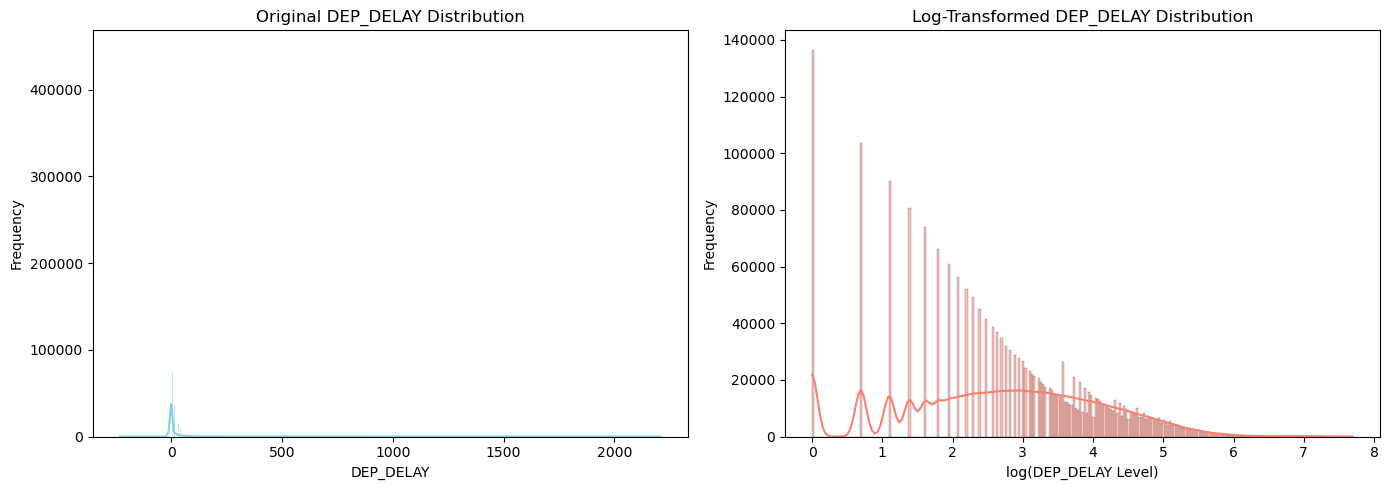

In [32]:
#visualising target data
#departure delay

# Ensure output directory exists
os.makedirs("fig", exist_ok=True)

# Compute log(Glucose) – add small epsilon if needed to avoid log(0)
df_2017['log_depdelay'] = np.log(df_2017['DEP_DELAY'])

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot original glucose distribution
sns.histplot(data=df_2017, x='DEP_DELAY', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original DEP_DELAY Distribution')
axes[0].set_xlabel('DEP_DELAY')
axes[0].set_ylabel('Frequency')

# Add annotation
#axes[0].text(0.95, 0.85, 'Strongly right-skewed',
             #horizontalalignment='right',
            # verticalalignment='center',
            # transform=axes[0].transAxes,
            # fontsize=12, color='black')

# Plot log-transformed glucose distribution
sns.histplot(data=df_2017, x='log_depdelay', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Log-Transformed DEP_DELAY Distribution')
axes[1].set_xlabel('log(DEP_DELAY Level)')
axes[1].set_ylabel('Frequency')

# Add annotation
#axes[1].text(0.95, 0.85, 'Nearly symmetric',
             #horizontalalignment='right',
             #verticalalignment='center',
             #transform=axes[1].transAxes,
            # fontsize=12, color='black')

# Adjust layout and save
plt.tight_layout()
#plt.savefig("fig/DepDelay_vs_LogGlucose.png", bbox_inches='tight', dpi=300)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


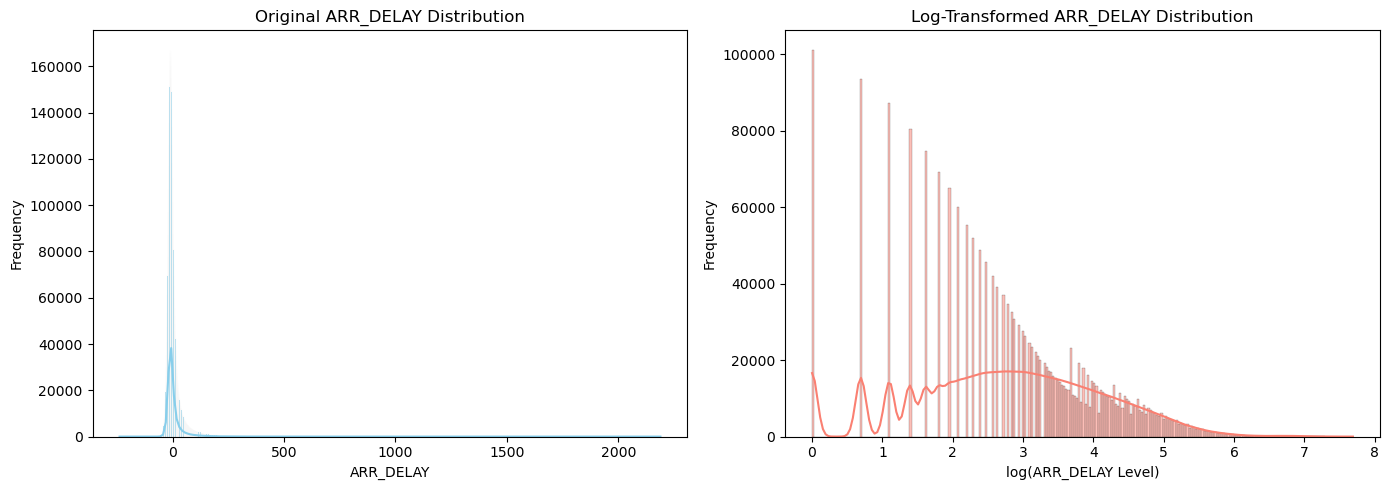

In [33]:
#visualising target data
#departure delay

# Ensure output directory exists
os.makedirs("fig", exist_ok=True)

# Compute log(Glucose) – add small epsilon if needed to avoid log(0)
df_2017['log_arrdelay'] = np.log(df_2017['ARR_DELAY'])

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot original glucose distribution
sns.histplot(data=df_2017, x='ARR_DELAY', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original ARR_DELAY Distribution')
axes[0].set_xlabel('ARR_DELAY')
axes[0].set_ylabel('Frequency')

# Add annotation
#axes[0].text(0.95, 0.85, 'Strongly right-skewed',
             #horizontalalignment='right',
            # verticalalignment='center',
            # transform=axes[0].transAxes,
            # fontsize=12, color='black')

# Plot log-transformed glucose distribution
sns.histplot(data=df_2017, x='log_arrdelay', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Log-Transformed ARR_DELAY Distribution')
axes[1].set_xlabel('log(ARR_DELAY Level)')
axes[1].set_ylabel('Frequency')

# Add annotation
#axes[1].text(0.95, 0.85, 'Nearly symmetric',
             #horizontalalignment='right',
             #verticalalignment='center',
             #transform=axes[1].transAxes,
            # fontsize=12, color='black')

# Adjust layout and save
plt.tight_layout()
#plt.savefig("fig/DepDelay_vs_LogGlucose.png", bbox_inches='tight', dpi=300)
plt.show()

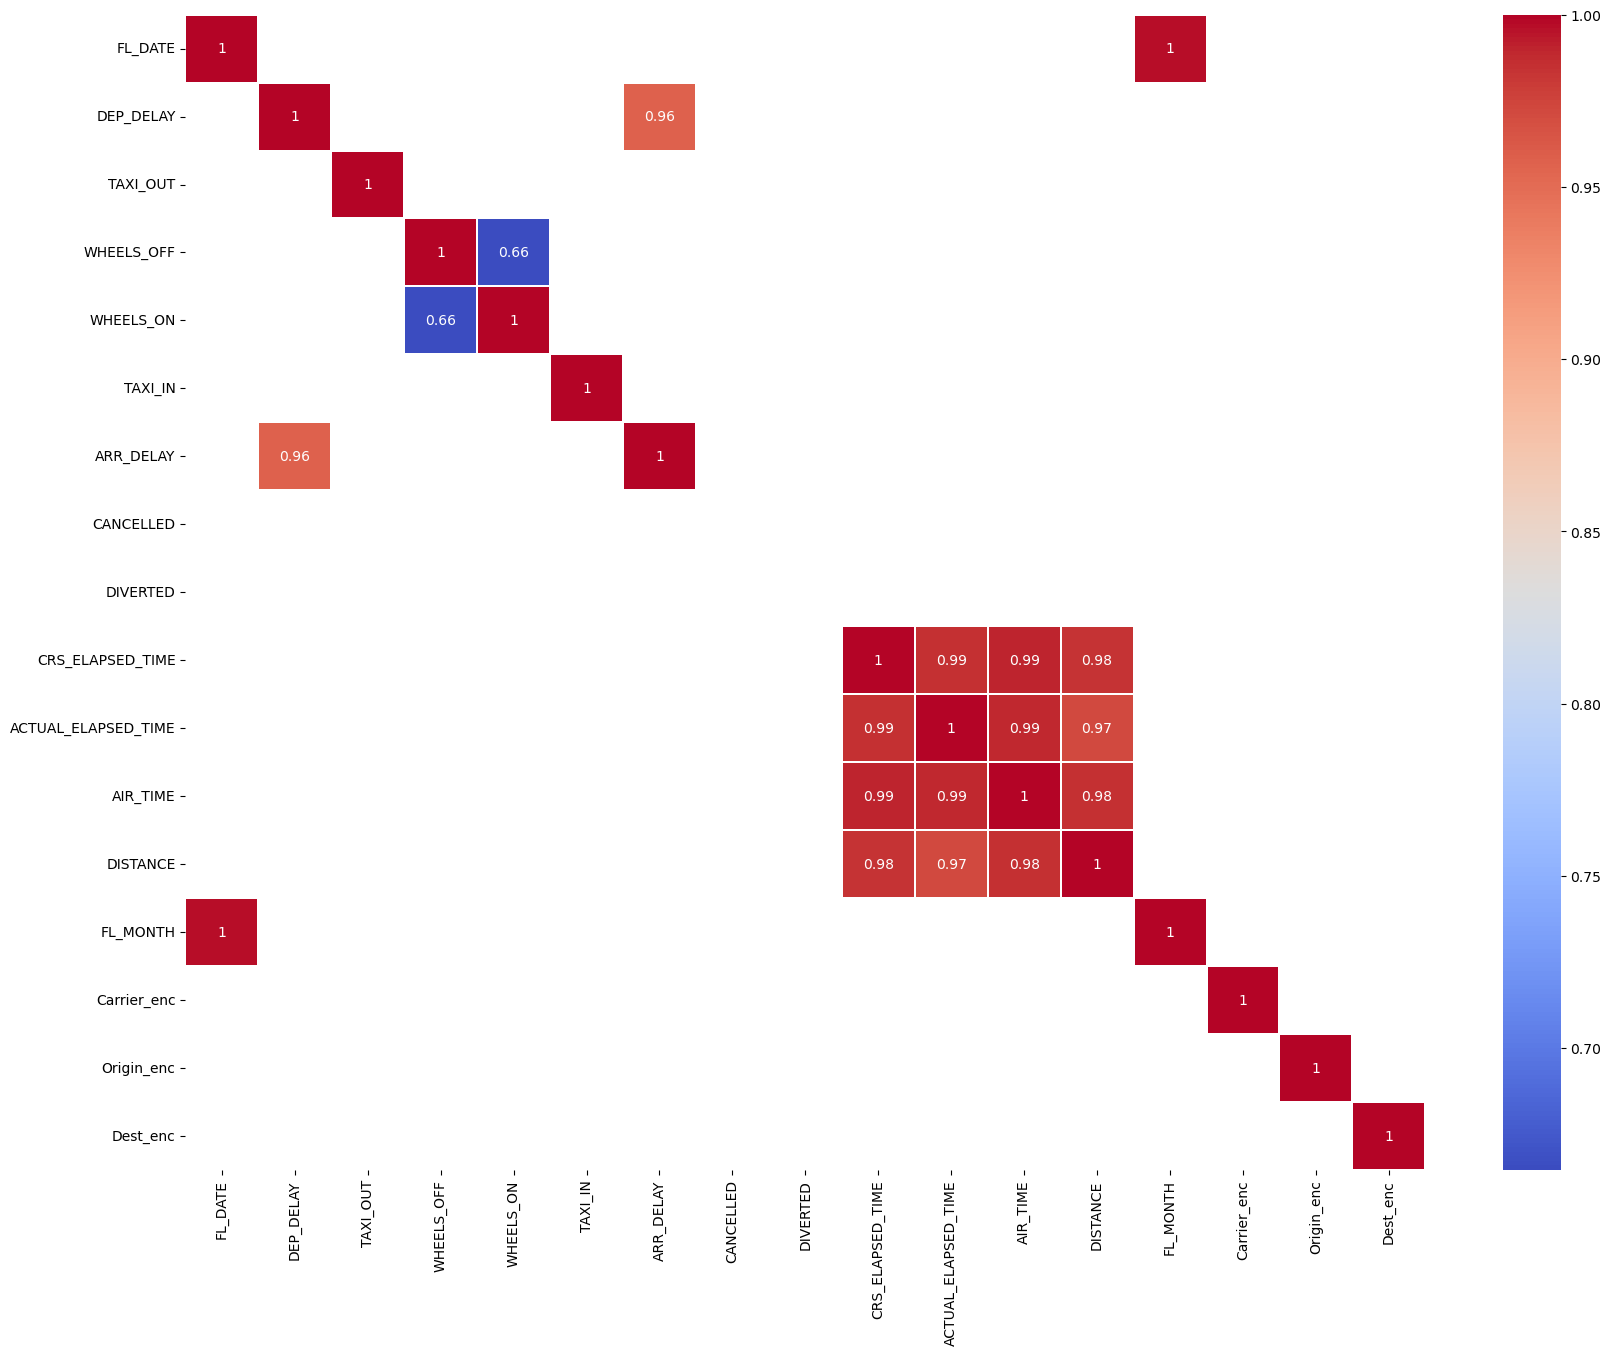

In [34]:
#heatmap
# Create a correlation matrix
corr_matrix = df2017_cleaned.corr()

# Replace values smaller than 0.3 in absolute value with np.nan
corr_matrix[corr_matrix.abs() < 0.3] = np.nan

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)

# Get the current figure
fig = plt.gcf()

# Set figure size
fig.set_size_inches(20, 15)

# Show the plot
plt.show()

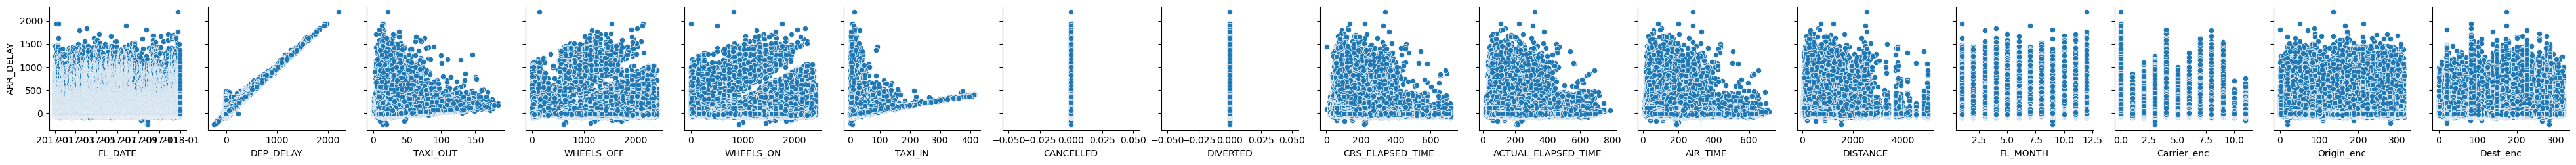

In [35]:
#pair plot for arr_delay
focus_vars = ["ARR_DELAY"]
other_vars = [col for col in df2017_cleaned.columns if col not in focus_vars]
pp = sns.pairplot(data=df2017_cleaned,
                  x_vars=other_vars,
                  y_vars=focus_vars)

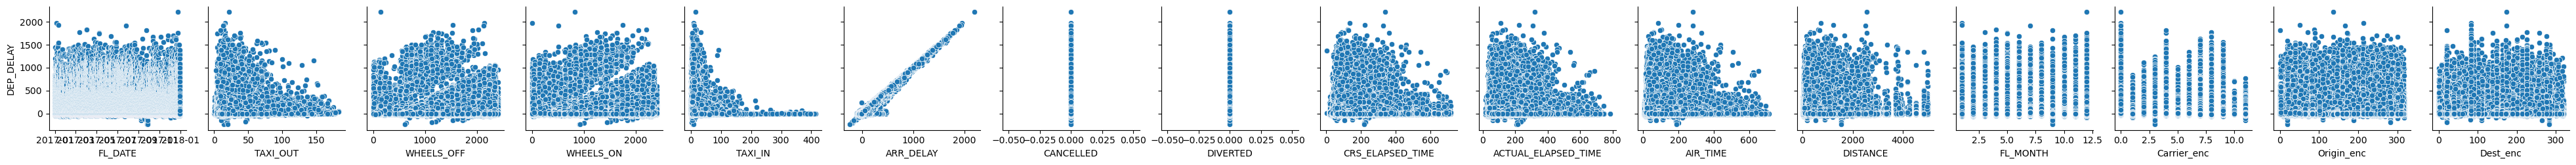

In [36]:
#pair plot for arr_delay
focus_vars = ["DEP_DELAY"]
other_vars = [col for col in df2017_cleaned.columns if col not in focus_vars]
pp = sns.pairplot(data=df2017_cleaned,
                  x_vars=other_vars,
                  y_vars=focus_vars)

In [37]:
#anova for categorical
from scipy import stats

#month
groups1 = [group["ARR_DELAY"].values for month, group in df2017_cleaned.groupby("FL_MONTH")]
f_stat, p_val = stats.f_oneway(*groups1)
print(f"ARR_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

groups2 = [group["DEP_DELAY"].values for month, group in df2017_cleaned.groupby("FL_MONTH")]
f_stat, p_val = stats.f_oneway(*groups2)
print(f"DEP_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

# p-value is very small (e.g., < 0.05): There is a statistically significant difference in the mean arrival/departure delays across different months. 
# This means that the month of the year affects flight delays 

ARR_DELAY F-statistic: 3342.845, p-value: 0.000
DEP_DELAY F-statistic: 2343.059, p-value: 0.000


In [38]:
#anova for categorical
from scipy import stats

#Carrier_enc
groups1 = [group["ARR_DELAY"].values for month, group in df2017_cleaned.groupby("Carrier_enc")]
f_stat, p_val = stats.f_oneway(*groups1)
print(f"ARR_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

groups2 = [group["DEP_DELAY"].values for month, group in df2017_cleaned.groupby("Carrier_enc")]
f_stat, p_val = stats.f_oneway(*groups2)
print(f"DEP_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

#the airline company is an important factor influencing flight delays. 
# If the p-values are small, you can conclude that some airlines have consistently higher or lower delays than others.

ARR_DELAY F-statistic: 2241.957, p-value: 0.000
DEP_DELAY F-statistic: 1781.787, p-value: 0.000


In [39]:
#anova for categorical

#Origin_enc
groups1 = [group["ARR_DELAY"].values for month, group in df2017_cleaned.groupby("Origin_enc")]
f_stat, p_val = stats.f_oneway(*groups1)
print(f"ARR_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

groups2 = [group["DEP_DELAY"].values for month, group in df2017_cleaned.groupby("Origin_enc")]
f_stat, p_val = stats.f_oneway(*groups2)
print(f"DEP_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

ARR_DELAY F-statistic: 66.673, p-value: 0.000
DEP_DELAY F-statistic: 76.828, p-value: 0.000


In [40]:
#anova for categorical

#Dest_enc
groups1 = [group["ARR_DELAY"].values for month, group in df2017_cleaned.groupby("Dest_enc")]
f_stat, p_val = stats.f_oneway(*groups1)
print(f"ARR_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

groups2 = [group["DEP_DELAY"].values for month, group in df2017_cleaned.groupby("Dest_enc")]
f_stat, p_val = stats.f_oneway(*groups2)
print(f"DEP_DELAY F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

ARR_DELAY F-statistic: 107.360, p-value: 0.000
DEP_DELAY F-statistic: 111.374, p-value: 0.000


# DELAY & AIRLINES

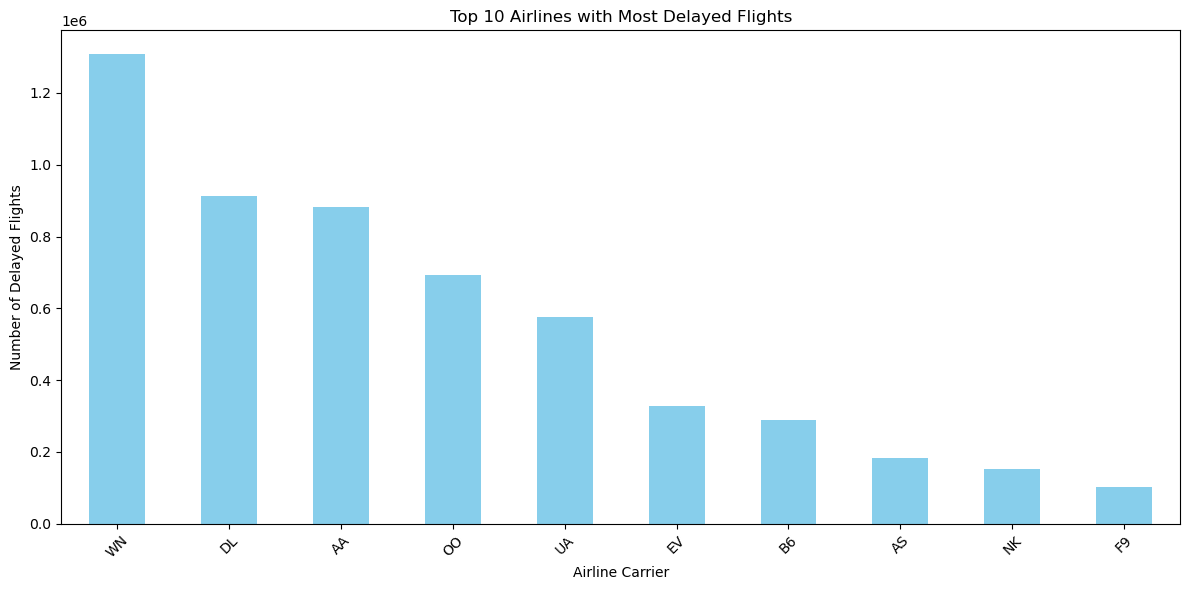

In [41]:
#identify the airlined companies and number of delayed flights top 10
top_airlines = df_2017.groupby('OP_CARRIER')['DEP_DELAY'].count().nlargest(10)
# Plotting the top 10 airlines with the most delayed flights
plt.figure(figsize=(12, 6))
top_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines with Most Delayed Flights')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("fig/Top_10_Airlines_with_Most_Delayed_Flights.png", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

In [42]:
# Statistical summary for each airline
airline_stats = df_2017.groupby('OP_CARRIER').agg(
    count=('DEP_DELAY', 'count'),
    max_dep_delay=('DEP_DELAY', 'max'),
    min_dep_delay=('DEP_DELAY', 'min'),
    mean_dep_delay=('DEP_DELAY', 'mean'),
    max_arr_delay=('ARR_DELAY', 'max'),
    min_arr_delay=('ARR_DELAY', 'min'),
    mean_arr_delay=('ARR_DELAY', 'mean')
).reset_index()
print(airline_stats)
#print arline_stats in order of highest number of delayed flights
airline_stats = airline_stats.sort_values(by='count', ascending=False)
print(airline_stats)


   OP_CARRIER    count  max_dep_delay  min_dep_delay  mean_dep_delay  \
0          AA   882218         2208.0          -34.0        8.112226   
1          AS   183056          834.0          -92.0        2.361561   
2          B6   289627         1111.0          -32.0       16.468838   
3          DL   912792         1246.0         -234.0        8.418618   
4          EV   328574         1816.0          -43.0       12.612635   
5          F9   101917         1012.0          -41.0       12.067722   
6          HA    79861         1335.0          -33.0        1.366224   
7          NK   151468         1634.0          -50.0       10.116374   
8          OO   694014         1773.0          -59.0       10.240932   
9          UA   577212         1553.0          -68.0        9.422656   
10         VX    69682          705.0          -23.0       13.145848   
11         WN  1308989          768.0         -151.0       10.218592   

    max_arr_delay  min_arr_delay  mean_arr_delay  
0          2

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/486482403.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size=4, palette=colors_strip,
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/486482403.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60))
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/486482403.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
/var/folders/87/lqqrw43x7

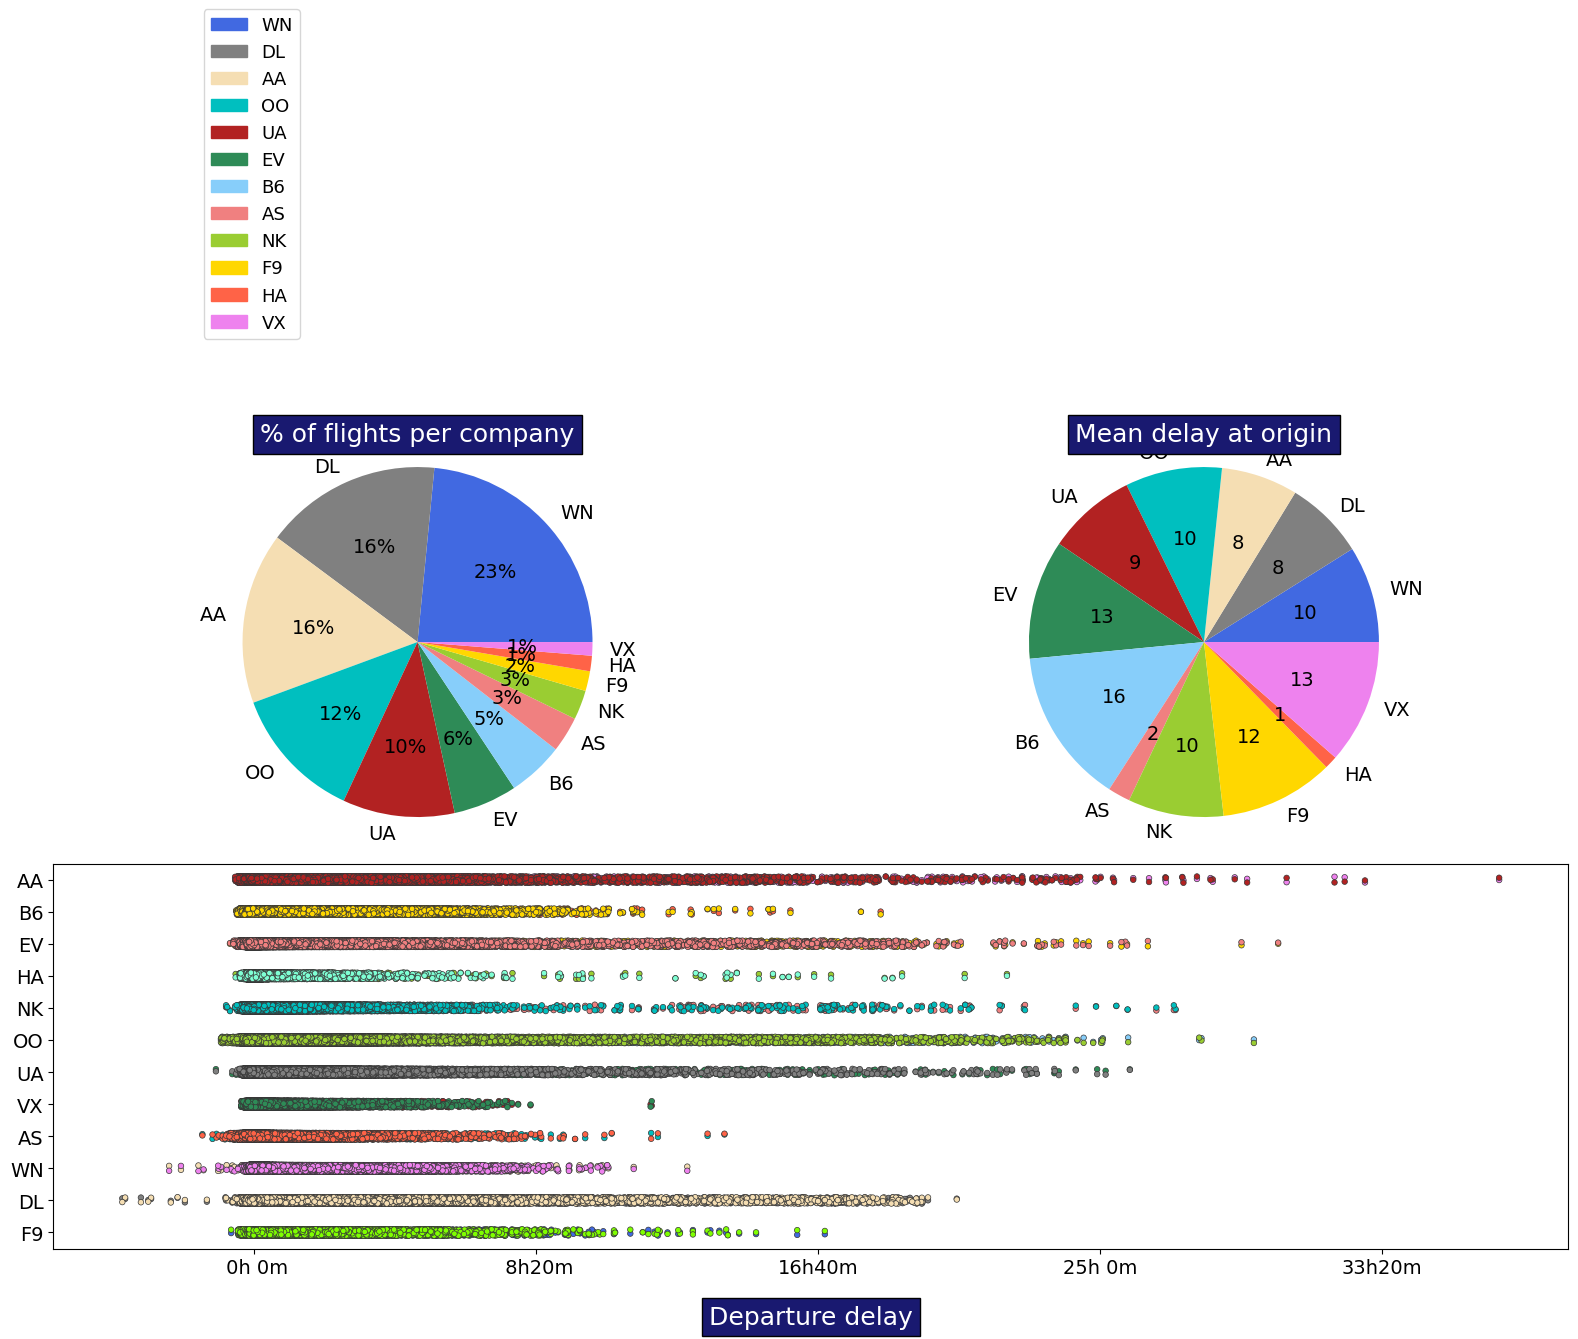

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

# Define font dictionary
font = {'family': 'sans-serif', 'weight': 'normal', 'size': 14}

# Set font
mpl.rc('font', **font)

# Prepare data for plotting
labels = airline_stats['OP_CARRIER'].tolist()
sizes_count = airline_stats['count'].values
sizes_mean = airline_stats['mean_dep_delay'].clip(lower=0).values

# Color palette (repeat if fewer than 12 airlines)
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse'][:len(labels)]

fig = plt.figure(1, figsize=(16, 15))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Pie chart 1: Number of flights
explode_count = [0.3 if sizes_count[i] < 20000 else 0.0 for i in range(len(labels))]
patches1, texts1, autotexts1 = ax1.pie(
    sizes_count, explode=explode_count, labels=labels, colors=colors, autopct='%1.0f%%',
    shadow=False, startangle=0
)
for t in texts1:
    t.set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor': 'midnightblue', 'pad': 5},
              color='w', fontsize=18)

# Legend: just show carrier code
comp_handler = [
    mpatches.Patch(color=colors[i], label=labels[i])
    for i in range(len(labels))
]
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9),
           fontsize=13, bbox_transform=plt.gcf().transFigure)

# Pie chart 2: Mean departure delay
explode_mean = [0.0 if sizes_mean[i] < 20000 else 0.01 for i in range(len(labels))]
patches2, texts2, autotexts2 = ax2.pie(
    sizes_mean, explode=explode_mean, labels=labels, colors=colors, shadow=False, startangle=0,
    autopct=lambda p: '{:.0f}'.format(p * sum(sizes_mean) / 100)
)
for t in texts2:
    t.set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor': 'midnightblue', 'pad': 5},
              color='w', fontsize=18)

# Prepare data for stripplot
import seaborn as sns
df2 = df_2017.loc[:, ['OP_CARRIER', 'DEP_DELAY']].copy()
df2 = df2.rename(columns={'OP_CARRIER': 'AIRLINE', 'DEP_DELAY': 'DEPARTURE_DELAY'})

# Stripplot
colors_strip = colors[::-1]  # reverse for variety
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size=4, palette=colors_strip,
                    data=df2, linewidth=0.5, jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60))
                     for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 


/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3092460663.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


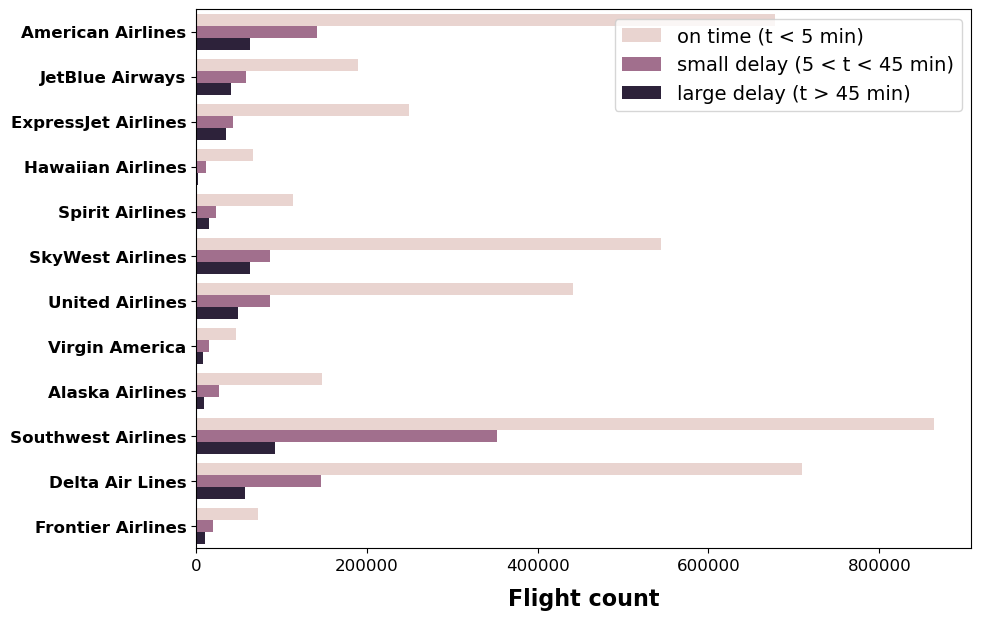

In [44]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x: ((0, 1)[x > 5], 2)[x > 45]
df2['DELAY_LEVEL'] = df2['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df2)
#____________________________________________________________________________________
# If you have a mapping from code to full name, define it here. Otherwise, just use the code.
# Example mapping (replace with actual names if available):
abbr_companies = {
	'WN': 'Southwest Airlines',
	'DL': 'Delta Air Lines',
	'AA': 'American Airlines',
	'OO': 'SkyWest Airlines',
	'UA': 'United Airlines',
	'EV': 'ExpressJet Airlines',
	'B6': 'JetBlue Airways',
	'AS': 'Alaska Airlines',
	'NK': 'Spirit Airlines',
	'F9': 'Frontier Airlines',
	'HA': 'Hawaiian Airlines',
	'VX': 'Virgin America'
}
labels = [abbr_companies.get(item.get_text(), item.get_text()) for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/105264564.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/105264564.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/105264564.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/105264564.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

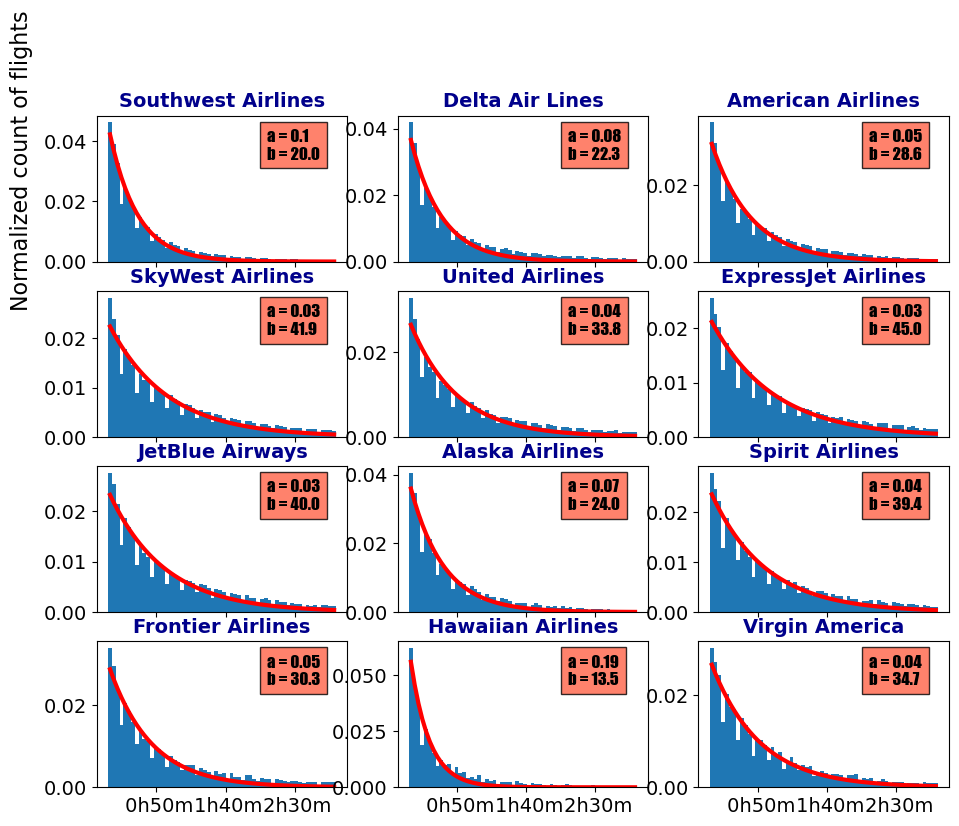

In [45]:
#___________________________________________
# Model function used to fit the histograms
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,11))
i = 0
for carrier_code in abbr_companies:
    carrier_name = abbr_companies[carrier_code]
    i += 1
    ax = fig.add_subplot(5,3,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_code]['DEPARTURE_DELAY'],
                                range = (15,180), density=True, bins=60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

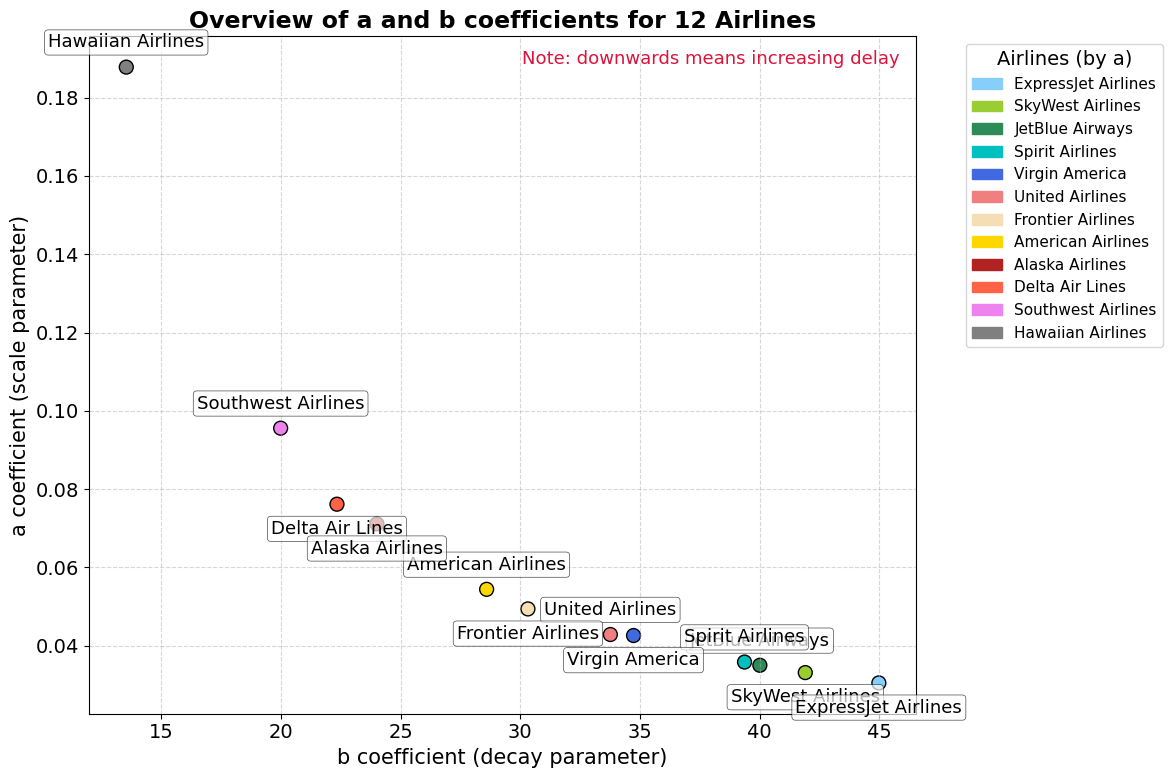

In [46]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Prepare x_val, y_val, y_shift
x_val = [p[1] for p in points]  # b coefficients
y_val = [p[0] for p in points]  # a coefficients
y_shift = np.zeros_like(y_val)  # no shift, or you can use small offsets if you want

# Prepare data sorted by a (y_val)
sorted_indices = np.argsort(y_val)
sorted_names = [label_company[i] for i in sorted_indices]
sorted_a = [y_val[i] for i in sorted_indices]
sorted_colors = [colors_strip[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_val, y_val, color=[colors_strip[i] for i in range(len(y_val))], s=100, edgecolor='black')

# Annotate each point with airline name, offset for clarity
for i, name in enumerate(label_company):
    offset = 0.004 if i % 2 == 0 else -0.004
    ax.annotate(name, (x_val[i], y_val[i] + y_shift[i] + offset), fontsize=13, 
                ha='center', va='bottom' if offset > 0 else 'top', 
                bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, lw=0.5))

ax.set_xlabel('b coefficient (decay parameter)', fontsize=15)
ax.set_ylabel('a coefficient (scale parameter)', fontsize=15)
ax.set_title('Overview of a and b coefficients for 12 Airlines', fontsize=17, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Add note about direction of delay (move upwards, top right)
ax.text(0.98, 0.98, 'Note: downwards means increasing delay', 
        transform=ax.transAxes, fontsize=13, color='crimson', ha='right', va='top')


# Add color legend
legend_patches = [mpatches.Patch(color=color, label=name) for name, color in zip(sorted_names, sorted_colors)]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, title="Airlines (by a)")

plt.tight_layout()
plt.show()


/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2088510830.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flight_counts, x='OP_CARRIER', y='num_flights', palette='viridis')


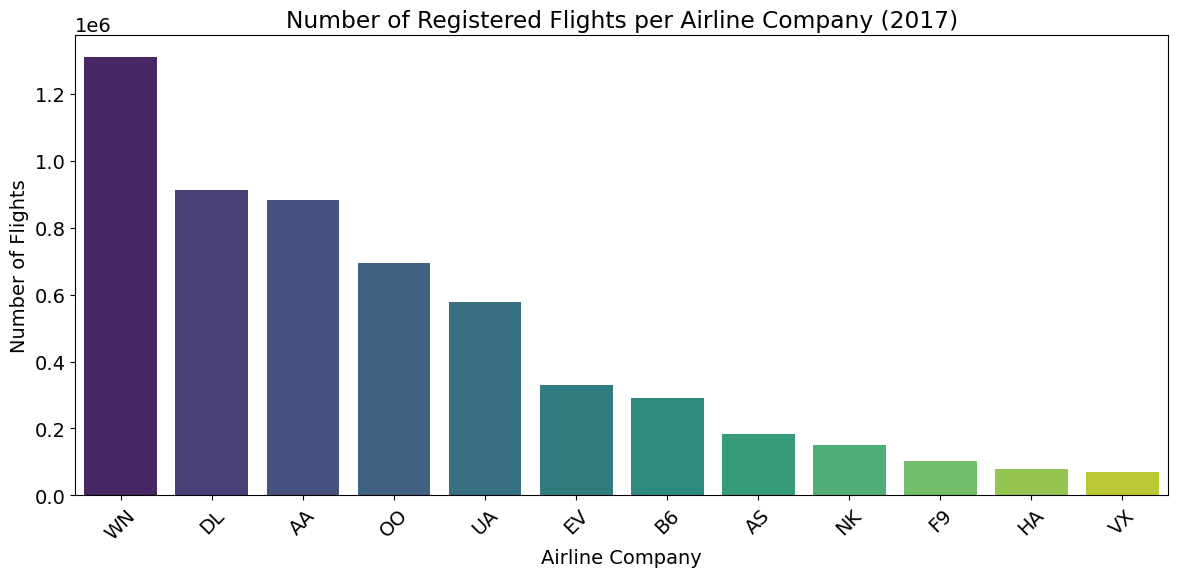

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and count number of flights for each
flight_counts = df_2017.groupby('OP_CARRIER').size().reset_index(name='num_flights')

# Sort by number of flights descending
flight_counts = flight_counts.sort_values('num_flights', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=flight_counts, x='OP_CARRIER', y='num_flights', palette='viridis')
plt.title('Number of Registered Flights per Airline Company (2017)')
plt.xlabel('Airline Company')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DELAY v ORIGIN

month > carrier > dest > origin

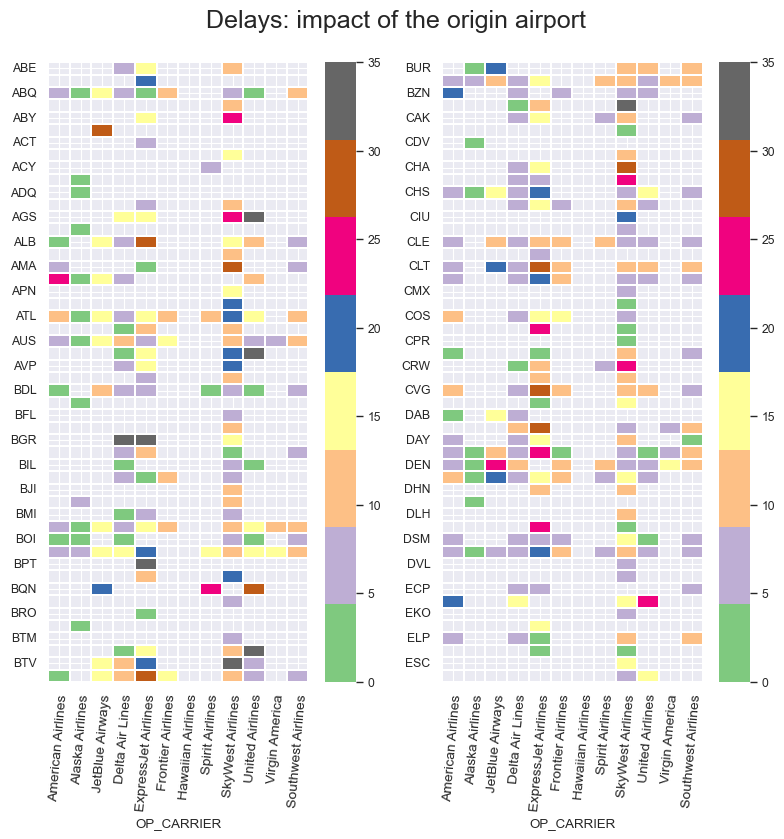

In [48]:
# Compute mean departure delay for each airport (ORIGIN) and carrier (OP_CARRIER)
airport_mean_delays = df_2017.groupby(['ORIGIN', 'OP_CARRIER'])['DEP_DELAY'].mean().unstack()

# Define a function to map airport codes to names (extend as needed)
def identify_airport(code):
    airport_names = {
        'JFK': 'John F. Kennedy Intl',
        'LAX': 'Los Angeles Intl',
        'ORD': "O'Hare Intl",
        # Add more mappings as needed
    }
    return airport_names.get(code, code)

# Map all ORIGIN codes to full names
airport_mean_delays.index = airport_mean_delays.index.map(identify_airport)

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85)
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85)
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()


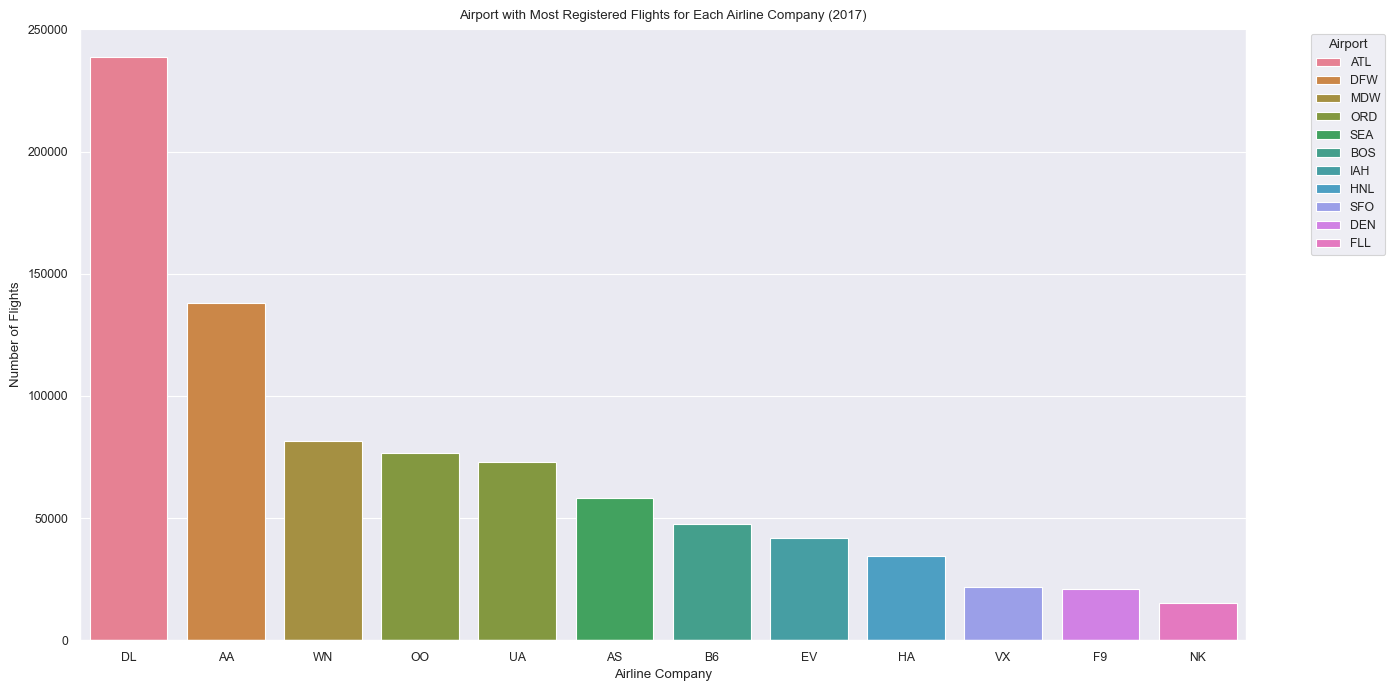

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each airline, find the airport with the most registered flights
most_flights_per_airline = (
    df_2017.groupby(['OP_CARRIER', 'ORIGIN'])
    .size()
    .reset_index(name='num_flights')
    .sort_values(['OP_CARRIER', 'num_flights'], ascending=[True, False])
    .drop_duplicates('OP_CARRIER', keep='first')
    .sort_values('num_flights', ascending=False)
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=most_flights_per_airline,
    x='OP_CARRIER',
    y='num_flights',
    hue='ORIGIN',
    dodge=False
)
plt.title('Airport with Most Registered Flights for Each Airline Company (2017)')
plt.xlabel('Airline Company')
plt.ylabel('Number of Flights')
plt.legend(title='Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# DELAY & MONTH / TIME 


/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3635603950.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_delays, x='FL_MONTH', y='num_delays', palette='Blues_d')


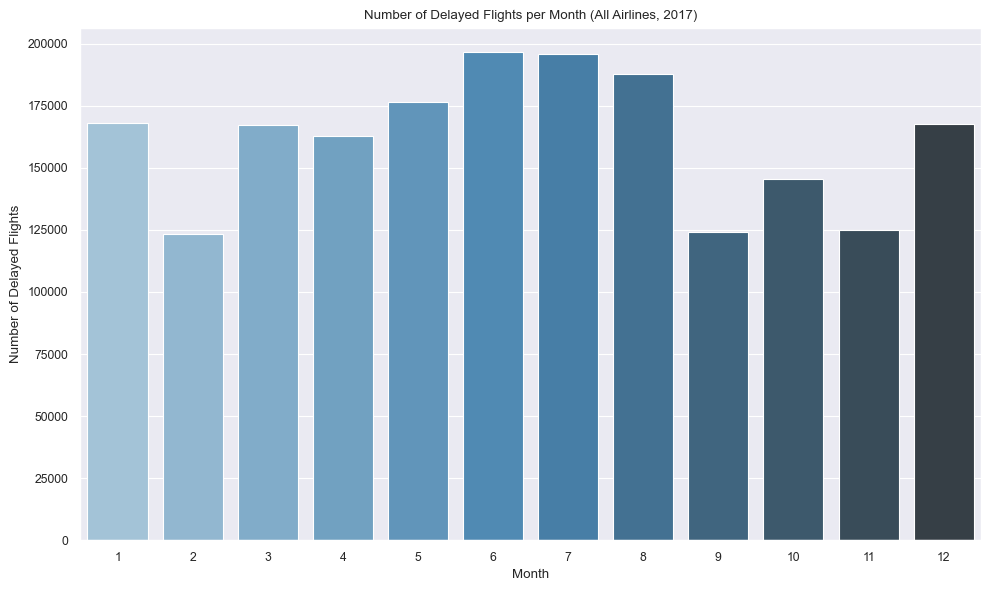

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for delayed flights only (DEP_DELAY > 0)
delayed_flights = df_2017[df_2017['DEP_DELAY'] > 0]

# Group by month, count number of delayed flights
monthly_delays = delayed_flights.groupby('FL_MONTH').size().reset_index(name='num_delays')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_delays, x='FL_MONTH', y='num_delays', palette='Blues_d')
plt.title('Number of Delayed Flights per Month (All Airlines, 2017)')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.tight_layout()
plt.show()

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/523428621.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['OP_CARRIER'] = pd.Categorical(


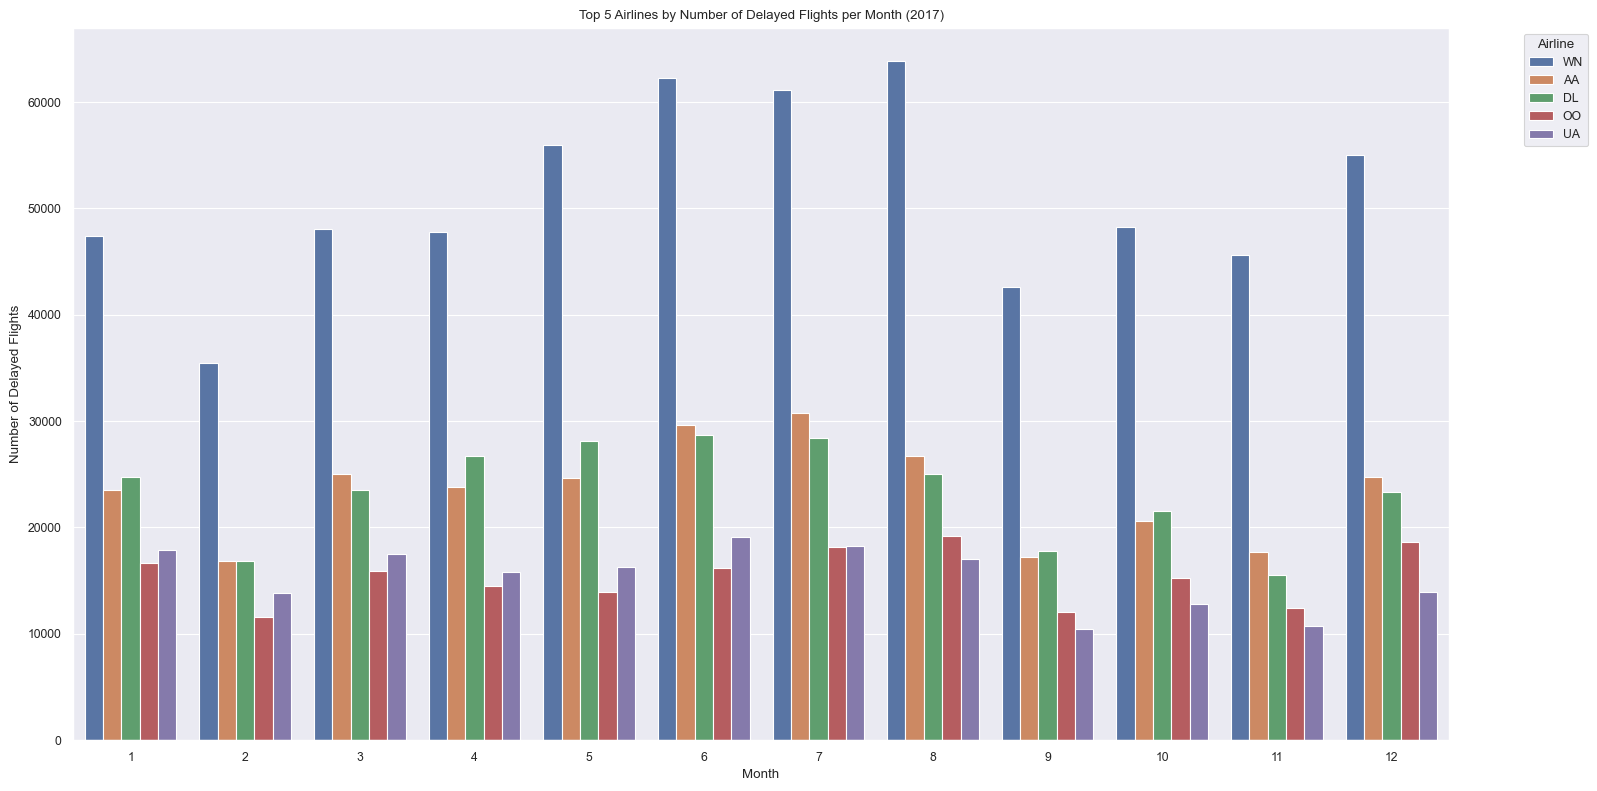

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate number of delayed flights per airline per month
delayed_flights = df_2017[df_2017['DEP_DELAY'] > 0]
monthly_airline_delays = delayed_flights.groupby(['FL_MONTH', 'OP_CARRIER']).size().reset_index(name='num_delays')

# Find top 5 airlines by total number of delayed flights
top5_carriers = (
    monthly_airline_delays.groupby('OP_CARRIER')['num_delays']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter for only top 5 airlines
top5 = monthly_airline_delays[monthly_airline_delays['OP_CARRIER'].isin(top5_carriers)]

# Calculate total delayed flights per airline (across all months)
airline_total_delays = top5.groupby('OP_CARRIER')['num_delays'].sum().sort_values(ascending=False)

# Create a categorical type for OP_CARRIER, ordered by total delays (highest to lowest)
top5['OP_CARRIER'] = pd.Categorical(
    top5['OP_CARRIER'],
    categories=airline_total_delays.index,
    ordered=True
)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=top5,
    x='FL_MONTH',
    y='num_delays',
    hue='OP_CARRIER',
    hue_order=airline_total_delays.index  # Ensures legend is sorted by total delays
)
plt.title('Top 5 Airlines by Number of Delayed Flights per Month (2017)')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# DELAYS & FLIGHT TIME


In [52]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])  

In [53]:
carrier = 'OO'
id_airport = 4
liste_origin_airport = df_2017[df_2017['OP_CARRIER'] == carrier]['ORIGIN'].unique()
df2 = df_2017[(df_2017['OP_CARRIER'] == carrier) & (df_2017['ARR_DELAY'] > 0)
              & (df_2017['ORIGIN'] == liste_origin_airport[id_airport])]
df2.sort_values('CRS_DEP_TIME', inplace=True)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/177188947.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('CRS_DEP_TIME', inplace=True)


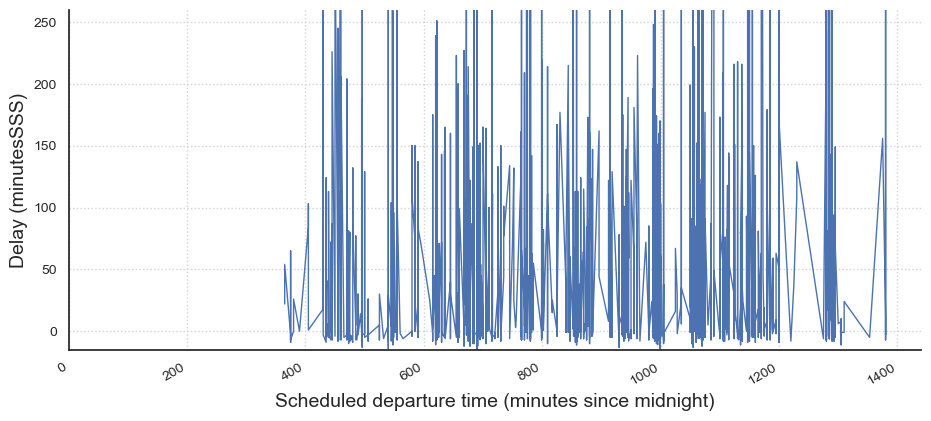

In [54]:
import datetime

# Use 'CRS_DEP_TIME' if 'SCHEDULED_DEPARTURE' does not exist
if 'SCHEDULED_DEPARTURE' in df2.columns:
    x_vals = df2['SCHEDULED_DEPARTURE']
    xlabel = 'Departure date'
else:
    # Convert CRS_DEP_TIME to minutes since midnight for plotting
    def time_to_minutes(x):
        x = str(int(x)).zfill(4)
        hour = int(x[:2])
        minute = int(x[2:])
        return hour * 60 + minute
    x_vals = df2['CRS_DEP_TIME'].apply(time_to_minutes)
    xlabel = 'Scheduled departure time (minutes since midnight)'

fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(x_vals, df2['DEP_DELAY'], linestyle='-')
fig1.style()
fig1.set_ylabel('Delay (minutesSSS)', fontsize=14)
fig1.set_xlabel(xlabel, fontsize=14)
if xlabel == 'Departure date':
    date_1 = datetime.datetime(2017, 6, 1)
    date_2 = datetime.datetime(2017, 7, 30)
    fig1.set_xlim(date_1, date_2)
else:
    fig1.set_xlim(0, 1440)  # 0 to 1440 minutes (full day)
fig1.set_ylim(-15, 260)

This suggests that an important variable in the modeling of delays will be take-off time.

In [55]:
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c

# Define get_stats as in cell 55
def get_stats(x):
    return pd.Series({
        'count': x.count(),
        'mean': x.mean(),
        'std': x.std()
    })

# Convert CRS_DEP_TIME to minutes since midnight
def time_to_minutes(x):
    x = str(int(x)).zfill(4)
    hour = int(x[:2])
    minute = int(x[2:])
    return hour * 60 + minute

df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(time_to_minutes)
test2 = df2['DEP_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
x_val = test2.index.values  # already in minutes since midnight
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0=[1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index=test2.index)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1434189057.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(time_to_minutes)


[Text(0, 0, '00:00'),
 Text(120, 0, '02:00'),
 Text(240, 0, '04:00'),
 Text(360, 0, '06:00'),
 Text(480, 0, '08:00'),
 Text(600, 0, '10:00'),
 Text(720, 0, '12:00'),
 Text(840, 0, '14:00'),
 Text(960, 0, '16:00'),
 Text(1080, 0, '18:00'),
 Text(1200, 0, '20:00'),
 Text(1320, 0, '22:00'),
 Text(1440, 0, '24:00')]

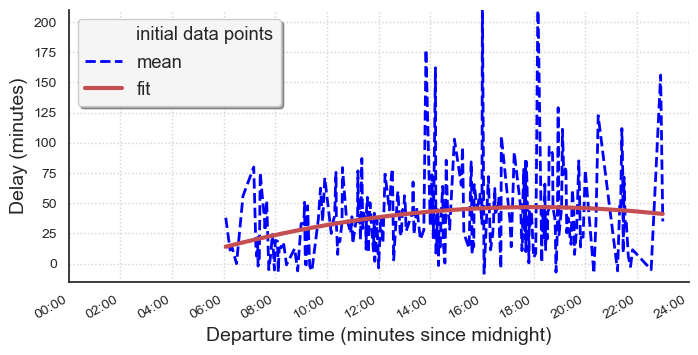

In [56]:
x_vals = df2['heure_depart'].values
mean_x = test2.index.values

fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(x_vals, df2['DEP_DELAY'], linestyle='', color='lightblue', label='initial data points')
fig1.cust_plot(mean_x, test2['mean'].values, linestyle='--', linewidth=2, color='blue', label='mean')
fig1.cust_plot(mean_x, test2['fit'].values, color='r', linestyle='-', linewidth=3, label='fit')
fig1.style()
fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize=14)
fig1.set_xlabel('Departure time (minutes since midnight)', fontsize=14)
fig1.set_ylim(-15, 210)

# Set x-ticks as time-of-day (e.g., 06:00, 12:00, 18:00)
import matplotlib.ticker as ticker
ax = fig1.axs[fig1.ix, fig1.iy]
def min_to_hm(x):
    h = int(x // 60)
    m = int(x % 60)
    return f"{h:02d}:{m:02d}"
xticks = np.arange(0, 1441, 120)  # every 2 hours
ax.set_xticks(xticks)
ax.set_xticklabels([min_to_hm(x) for x in xticks])

# LINEAR REGRESSION


In [57]:
import datetime

# Assuming your main DataFrame is df_2017 and the date column is 'FL_DATE'
df_train = df_2017[df_2017['FL_DATE'].apply(lambda x: x.date()) < datetime.date(2017, 1, 23)]
df_test  = df_2017[df_2017['FL_DATE'].apply(lambda x: x.date()) > datetime.date(2017, 1, 23)]
df = df_train

In [58]:
# Define a function to compute stats for each group
def get_stats(x):
    return pd.Series({
        'count': x.count(),
        'mean': x.mean(),
        'std': x.std()
    })

carrier = 'AA'
check_airports = df[df['OP_CARRIER'] == carrier]['DEP_DELAY'].groupby(
    df['ORIGIN']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending=False, inplace=True)
check_airports[-5:]

,count,mean,std
ORIGIN,,,
SDF,19.0,0.894737,12.753626
CRP,14.0,-1.357143,17.605100
MDT,13.0,2.384615,20.188852
AMA,13.0,16.923077,67.973600
ICT,12.0,2.916667,21.112075


In [59]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    #__________________________________
    # Conversion: date + heure -> heure
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart'].apply(fct)
    return test2

In [60]:
def linear_regression(test2):
    test = test2[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['heure_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result

In [61]:
from sklearn import linear_model

id_airport = 'PHL'
carrier = 'AA'  # Make sure carrier is defined

# Ensure CRS_DEP_TIME is zero-padded and numeric for plotting
df2 = df[(df['OP_CARRIER'] == carrier) & (df['ORIGIN'] == id_airport)].copy()
df2['CRS_DEP_TIME'] = df2['CRS_DEP_TIME'].astype(str).str.zfill(4)
df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(lambda x: int(x[:2]) * 3600 + int(x[2:]) * 60)

# Function: two scenarios (all values vs. delays < 60 min)
def get_flight_delays_fixed(df, carrier, id_airport, extrem_values=False):
    df2 = df[(df['OP_CARRIER'] == carrier) & (df['ORIGIN'] == id_airport)].copy()
    if extrem_values:
        df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
        df2 = df2.dropna(subset=['DEP_DELAY'])
    df2['CRS_DEP_TIME'] = df2['CRS_DEP_TIME'].astype(str).str.zfill(4)
    df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(lambda x: int(x[:2]) * 3600 + int(x[2:]) * 60)
    df2.sort_values('CRS_DEP_TIME', inplace=True)
    test2 = df2['DEP_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart']
    return test2

# First case: all values
test2 = get_flight_delays_fixed(df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)

# Second case: remove delays > 60 min
test3 = get_flight_delays_fixed(df, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2586001687.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:02d}h{:02d}m'.format(*fct_convert(x)) for x in ax.get_xticks()])


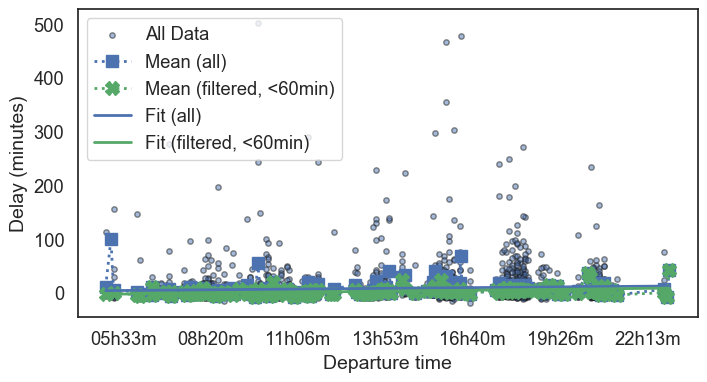

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# Scatter plot: all data points (before filtering)
ax.scatter(df2['heure_depart'], df2['DEP_DELAY'], edgecolor='k', alpha=0.5, label='All Data', s=15)

# Plot mean points for both cases
ax.plot(X1, Y1, color='b', linestyle=':', linewidth=2, marker='s', markersize=8, label='Mean (all)')
ax.plot(X2, Y2, color='g', linestyle=':', linewidth=2, marker='X', markersize=10, label='Mean (filtered, <60min)')

# Regression lines for both cases
ax.plot(X1, result2, color='b', linewidth=2, label='Fit (all)')
ax.plot(X2, result3, color='g', linewidth=2, label='Fit (filtered, <60min)')

ax.set_ylabel('Delay (minutes)', fontsize=14)
ax.set_xlabel('Departure time', fontsize=14)

# Convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600), int(divmod(x,3600)[1]/60))
ax.set_xticklabels(['{:02d}h{:02d}m'.format(*fct_convert(x)) for x in ax.get_xticks()])

ax.legend()
plt.show()

# PREDICTING FLIGHT DELAYS (POLYNOMIAL) 


a. Bias introduced by the separation of the data set

In [63]:
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

Other methods of the class have the following functions:

train (n) : drives the data on the training set and makes a polynomial of order n
predict (X) : calculates the Y points associated with the X input and for the previously driven model
calc_score () : calculates the model score in relation to the test set data

In [64]:
# Display all unique airport codes in the dataset (both origin and destination)

# Unique origin airport codes
origin_airports = df_2017['ORIGIN'].unique()
print("All ORIGIN airport codes:")
print(sorted(origin_airports))

# Unique destination airport codes
dest_airports = df_2017['DEST'].unique()
print("\nAll DEST airport codes:")
print(sorted(dest_airports))

# If you want to see all unique codes in one set:
all_airports = set(origin_airports) | set(dest_airports)
print("\nAll unique airport codes (ORIGIN or DEST):")
print(sorted(all_airports))

All ORIGIN airport codes:
['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CDV', 'CGI', 'CHA', 'CHO', 'CHS', 'CID', 'CIU', 'CKB', 'CLE', 'CLL', 'CLT', 'CMH', 'CMX', 'COD', 'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DCA', 'DEN', 'DFW', 'DHN', 'DLG', 'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP', 'EGE', 'EKO', 'ELM', 'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW', 'FAI', 'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD', 'FSM', 'FWA', 'GCC', 'GCK', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV', 'GPT', 'GRB', 'GRI', 'GRK', 'GRR', 'GSO', 'GSP', 'GST', 'GTF', 'GTR', 'GUC', 'GUM', 'HDN', 'HIB', 'HLN', 'HNL', 'HOB', 

modèle nº1 , min. pour n = 2, score = 19.0
modèle nº2 , min. pour n = 1, score = 9.1
modèle nº3 , min. pour n = 1, score = 6.3
modèle nº4 , min. pour n = 1, score = 4.7
modèle nº5 , min. pour n = 1, score = 9.7
modèle nº6 , min. pour n = 1, score = 19.8
modèle nº7 , min. pour n = 1, score = 16.3
modèle nº8 , min. pour n = 1, score = 21.5
modèle nº9 , min. pour n = 1, score = 8.8
modèle nº10, min. pour n = 1, score = 3.8
modèle nº11, min. pour n = 1, score = 3.2
modèle nº12, min. pour n = 1, score = 10.7
modèle nº13, min. pour n = 1, score = 7.4
modèle nº14, min. pour n = 1, score = 4.7
modèle nº15, min. pour n = 1, score = 17.5
modèle nº16, min. pour n = 1, score = 16.1
modèle nº17, min. pour n = 1, score = 8.9
modèle nº18, min. pour n = 1, score = 14.2
modèle nº19, min. pour n = 1, score = 2.3
modèle nº20, min. pour n = 1, score = 14.3
modèle nº21, min. pour n = 1, score = 7.2
modèle nº22, min. pour n = 2, score = 9.7
modèle nº23, min. pour n = 2, score = 10.3
modèle nº24, min. pour n

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)


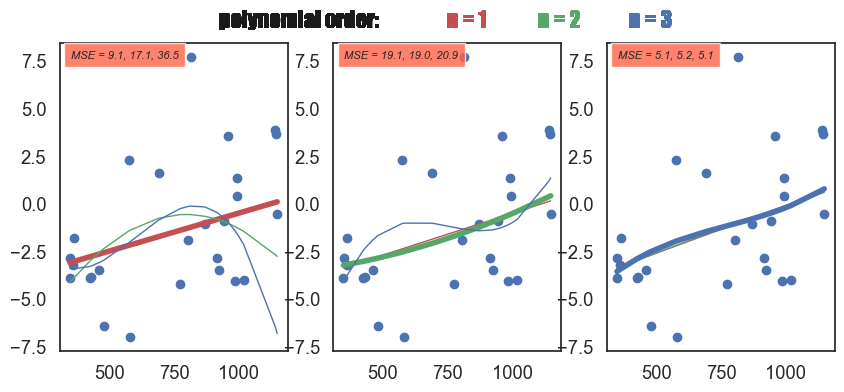

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 'BNA'
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['OP_CARRIER'] == carrier) & (df['ORIGIN'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
        df2 = df2.dropna(subset=['DEP_DELAY'])
    #__________________________________
    # Conversion: date + heure -> heure
    df2.sort_values('CRS_DEP_TIME', inplace = True)
    df2['heure_depart'] =  df2['CRS_DEP_TIME'].astype(str).str.zfill(4).apply(lambda x: int(x[:2])*60 + int(x[2:]))
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEP_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart']
    return test2

test2 = get_flight_delays(df, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("modèle nº{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

b. Selection by cross-validation

In [66]:
class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = 'neg_mean_squared_error'))

This class has two methods:

train (n, nb_folds) : defined 'nb_folds' training sets from the initial dataset and drives a 'n' order polynomial on each of these sets. This method returns as a result the Y predictions obtained for the different test sets.
calc_score (n, nb_folds) : performs the same procedure as a train method except that this method calculates the fit score and not the predicted values ​​on the different test data.

In [67]:
from sklearn.model_selection import cross_val_score

# id_airport = 'IAH'
nb_folds = 10
print('Max possible number of folds: {} \n'.format(test2.shape[0] - 1))
fit2 = fit_polynome_cv(test2)
for i in range(1, 8):
    fit2.calc_score(i, nb_folds)
    # Use 'neg_mean_squared_error' for scoring, and take abs() to get positive MSE
    print('n={} -> MSE = {}'.format(i, round(abs(fit2.score), 3)))

Max possible number of folds: 25 

n=1 -> MSE = 9.745
n=2 -> MSE = 10.392
n=3 -> MSE = 11.05
n=4 -> MSE = 12.681
n=5 -> MSE = 12.471
n=6 -> MSE = 12.611
n=7 -> MSE = 13.005


For this n=1 / polynomial of order 1 is the best model (best generalized model)

In [68]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 1)
fit.predict(fit.X)

In [69]:
from sklearn.model_selection import cross_val_predict

fit2.train(pol_order = 1, nb_folds = nb_folds)


/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3393949787.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))


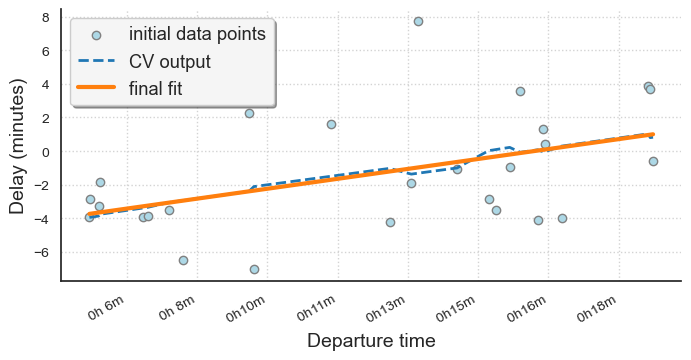

In [70]:
fig1 = Figure_style(8, 4, 1, 1) ; fig1.pos_update(0, 0)
fig1.cust_scatter(fit2.X, fit2.Y, markeredge = True, label = 'initial data points')
fig1.cust_plot(fit.X,fit2.result,color=u'#1f77b4',linestyle='--',linewidth=2,label='CV output')
fig1.cust_plot(fit.X,fit.result,color=u'#ff7f0e',linewidth = 3,label='final fit')
fig1.style(); fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)') ; fig1.set_xlabel('Departure time')
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [71]:
score = metrics.mean_squared_error(fit.result, fit2.Y)
score

9.328072381398323

With this MSE, it tells that the model's prediction for flight delays are, on average, off by about 7.7 minutes from the actual delays.

# MODEL TEST 


In [72]:
test_data = get_flight_delays(df_test, carrier, id_airport, True)
test_data = test_data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
X_test = np.array(test_data['heure_depart_min'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
fit.predict(X_test)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)


In [73]:
score = metrics.mean_squared_error(fit.result, Y_test)
score

52.56872336117212

In [74]:
'Ecart = {:.2f} min'.format(np.sqrt(score))


'Ecart = 7.25 min'

The difference in minutes between the predicted delay and the actual delay is about 7.69 min.

2. MODEL 2 : ONE AIRLINE, ALL AIRPORTS 
- From the last model, it is from one airport only. Model 2 In particular, this will allow to predict delays on airports for which the number of data is low with a better accuracy. 

In [75]:
def get_merged_delays(df, carrier):
    liste_airports = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'heure_depart_min', 'mean']
    for id_airport in liste_airports:
        test2 = get_flight_delays(df, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[liste_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [76]:
carrier = 'AA'
def get_merged_delays(df, carrier):
	liste_airports = df[df['OP_CARRIER'] == carrier]['ORIGIN'].unique()
	i = 0
	liste_columns = ['AIRPORT_ID', 'heure_depart_min', 'mean']
	for id_airport in liste_airports:
		test2 = get_flight_delays(df, carrier, id_airport, True)
		test2.loc[:, 'AIRPORT_ID'] = id_airport
		test2 = test2[liste_columns]
		test2.dropna(how = 'any', inplace = True)
		if i == 0:
			merged_df = test2.copy()
		else:
			merged_df = pd.concat([merged_df, test2], ignore_index = True)
		i += 1    
	return merged_df

merged_df = get_merged_delays(df, carrier)
merged_df.shape

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWa

(3350, 3)

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

[(0, 'ABQ'), (1, 'ALB'), (2, 'AMA'), (3, 'ATL'), (4, 'AUS')]

In [78]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['heure_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(3350, 94) (3350, 1)


In [79]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 45.590239339474806


With this MSE of 45.59, this means that the model's average prediction error is about 6.75 min.

In [80]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'3.13%'

This value '3.13%' means that 3.13% of the model's prediction differ from the actual mean delay by more than 15 min

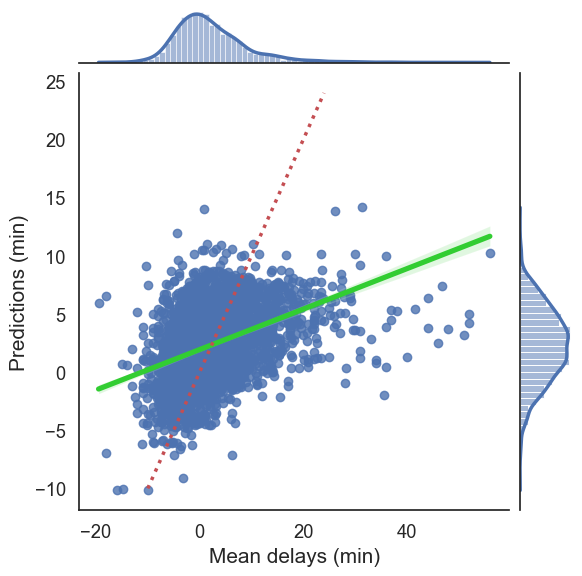

In [81]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions.ravel()]) 
tips["original_data"] = pd.Series([float(s) for s in Y.ravel()]) 
sns.jointplot(
    x="original_data", 
    y="prediction", 
    data=tips, 
    height=6, 
    ratio=7,
    joint_kws={'line_kws':{'color':'limegreen'}}, 
    kind='reg'
)
plt.xlabel('Mean delays (min)', fontsize=15)
plt.ylabel('Predictions (min)', fontsize=15)
plt.plot(list(range(-10, 25)), list(range(-10, 25)), linestyle=':', color='r')
plt.show()

This plot visually shows how well the model predicts mean delays. The closer the points and regression line are to the red dashed line, the better the model’s performance. Outliers or systematic deviations indicate where and how the model may be making errors

- Using POLYNOMIAL REGRESSION

In [96]:
poly = PolynomialFeatures(degree = 1)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

LinearRegression()

In [97]:

result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, Y))

MSE = 45.590239339474806


In [98]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

'3.13%'

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3686253175.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tips["prediction"] = pd.Series([float(s) for s in result])
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3686253175.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tips["original_data"] = pd.Series([float(s) for s in Y])


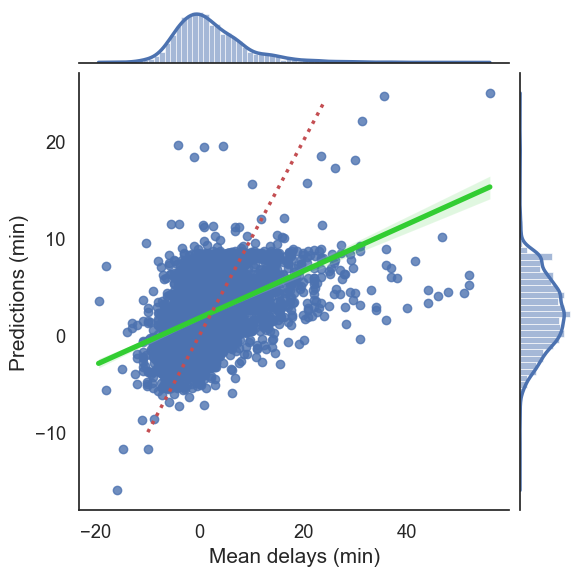

In [85]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in result]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, height=6, ratio=7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize=15)
plt.ylabel('Predictions (min)', fontsize=15)
plt.plot(list(range(-10, 25)), list(range(-10, 25)), linestyle=':', color='r')
plt.show()

SETTING FREE PARAMETERS 

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [100]:
X_train.shape

(2345, 94)

In [101]:

poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X_train)
regr.fit(X_, Y_train)
result = regr.predict(X_)
score = metrics.mean_squared_error(result, Y_train)
print("Mean squared error = ", score)

Mean squared error =  40.43970072773195


In [102]:
X_ = poly.fit_transform(X_test)
result = regr.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

Mean squared error =  64.4315573939703


This MSE is already a good score, this means that RMSE is about 8.02 min, meaning that this model's prediction are off by about 8 min from the true delay.

- REGULARIZATION METHOD

In [104]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.3)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=7.794e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


Ridge(alpha=0.3)

In [105]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

Mean squared error =  56.473511880422535


This shows a lower MSE, means this current model Ridge regression is better as it predicts mean flight delays with an average error of about 7.5 min. 

In [107]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)        
        if score < score_min:
            score_min = score
            parameters = [alpha/10, pol_order]
        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha, score))

n=1 alpha=0 , MSE = 1.0728e+25
n=1 alpha=2 , MSE = 54.635
n=1 alpha=4 , MSE = 54.252
n=1 alpha=6 , MSE = 53.929
n=1 alpha=8 , MSE = 53.652
n=1 alpha=10 , MSE = 53.411
n=1 alpha=12 , MSE = 53.2
n=1 alpha=14 , MSE = 53.014
n=1 alpha=16 , MSE = 52.848
n=1 alpha=18 , MSE = 52.699


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


n=2 alpha=0 , MSE = 56.912


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.71789e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


n=2 alpha=2 , MSE = 56.762


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.06278e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


n=2 alpha=4 , MSE = 56.304
n=2 alpha=6 , MSE = 56.196
n=2 alpha=8 , MSE = 56.088
n=2 alpha=10 , MSE = 55.978
n=2 alpha=12 , MSE = 55.951
n=2 alpha=14 , MSE = 55.887
n=2 alpha=16 , MSE = 55.856
n=2 alpha=18 , MSE = 55.825


In [108]:
# ...existing code...
print("Best parameters: alpha = {}, polynomial order = {}, with MSE = {:.3f}".format(parameters[0], parameters[1], score_min))
# ...existing code...

Best parameters: alpha = 1.8, polynomial order = 1, with MSE = 52.699


In [111]:
ridgereg = Ridge(alpha=parameters[0])
poly = PolynomialFeatures(degree=parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)
print("Best model MSE on all data:", score)

Best model MSE on all data: 45.67884719331672


- TESTING THE MODEL 

In [112]:
carrier = 'AA'
merged_df_test = get_merged_delays(df_test, carrier)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWa

In [113]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

merged_df_test['AIRPORT_ID'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = merged_df_test['AIRPORT_ID'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(merged_df_test['heure_depart_min'])
b = b.reshape(len(b),1)
X_test = np.hstack((matrix, b))
Y_test = np.array(merged_df_test['mean'])
Y_test = Y_test.reshape(len(Y_test), 1)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/177483729.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_test['AIRPORT_ID'].replace(label_conversion, inplace = True)


In [114]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
'MSE = {:.2f}'.format(score)

'MSE = 35.68'

In [115]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 5.97 min'

This MSE from the current best model predicts mean flight delays with an average error of about 5.97 min. tested and evaluated on the 2017 test set for AA (American Airlined, all airports)

# TEST 2018 DATA SET



In [169]:
df_2018 = pd.read_csv('2018.csv')

In [170]:
df_2018.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
#creating column with month
df_2018['FL_DATE'] = pd.to_datetime(df_2018['FL_DATE'])
df_2018['FL_MONTH'] = df_2018['FL_DATE'].dt.month

In [180]:
#dropping unnecessary columns
df_2018 = df_2018.drop(["Unnamed: 27",], axis=1)
df_2018 = df_2018.drop(columns=["CANCELLATION_CODE","CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"], axis=1)


In [181]:
df_2018.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY              117234
TAXI_OUT               115830
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                119246
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY              137040
CANCELLED                   0
DIVERTED                    0
CRS_ELAPSED_TIME           10
ACTUAL_ELAPSED_TIME    134442
AIR_TIME               134442
DISTANCE                    0
AIRPORT_ID                  0
heure_depart_min            0
FL_MONTH                    0
dtype: int64

In [182]:
df_2018.dropna(inplace = True)
df_2018.reset_index(drop = True, inplace = True)

In [183]:
#converting categorical to numbers
df_2018['OP_CARRIER'] = df_2018['OP_CARRIER'].astype('category')
#df_2018['Carrier_enc'] = df_2018['OP_CARRIER'].astype('category').cat.codes

df_2018['ORIGIN'] = df_2018['ORIGIN'].astype('category')
#df_2018['Origin_enc'] = df_2018['ORIGIN'].astype('category').cat.codes

df_2018['DEST'] = df_2018['DEST'].astype('category')
#df_2018['Dest_enc'] = df_2018['DEST'].astype('category').cat.codes

In [184]:
df_2018_filtered = df_2018[["DEP_DELAY","FL_MONTH","OP_CARRIER"]]
df_2018_filtered.head()

,DEP_DELAY,FL_MONTH,OP_CARRIER
0,-5.0,1,UA
1,-8.0,1,UA
2,-5.0,1,UA
3,6.0,1,UA
4,20.0,1,UA


In [185]:
df_2018_filtered.dropna(inplace = True)
df_2018_filtered.reset_index(drop = True, inplace = True)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1239375438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_filtered.dropna(inplace = True)


In [186]:
df_2018_filtered.head()

,DEP_DELAY,FL_MONTH,OP_CARRIER
0,-5.0,1,UA
1,-8.0,1,UA
2,-5.0,1,UA
3,6.0,1,UA
4,20.0,1,UA


In [187]:
groupby_month2 = df_2018.groupby("FL_MONTH").DEP_DELAY.agg(["size", "mean", "min", "max", "std"]).reset_index()
groupby_month2


,FL_MONTH,size,mean,min,max,std
0,1,551022,9.414259,-50.0,2007.0,46.041663
1,2,509642,9.323986,-51.0,2482.0,44.317408
2,3,592733,7.608554,-114.0,1559.0,38.731383
3,4,587626,8.401992,-60.0,1659.0,40.819706
4,5,606693,10.588185,-49.0,1632.0,45.491304
5,6,612480,13.000895,-53.0,1822.0,49.004792
6,7,631207,13.552413,-47.0,2710.0,48.797692
7,8,629346,13.643660,-57.0,1855.0,50.567221
8,9,576250,7.298594,-57.0,1491.0,41.087862
9,10,610334,6.933933,-42.0,2109.0,39.828296


In [188]:
groupby_airline2 = df_2018.groupby("OP_CARRIER").DEP_DELAY.agg(["size", "mean", "min", "max", "std"]).reset_index()
groupby_airline2

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3484002819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_airline2 = df_2018.groupby("OP_CARRIER").DEP_DELAY.agg(["size", "mean", "min", "max", "std"]).reset_index()


,OP_CARRIER,size,mean,min,max,std
0,9E,231815,10.751694,-38.0,1659.0,54.527413
1,AA,899527,9.994622,-33.0,2109.0,44.261374
2,AS,242979,2.428111,-114.0,839.0,27.548755
3,B6,297758,15.764134,-32.0,1489.0,48.215254
4,DL,943837,7.406832,-40.0,1207.0,40.319993
5,EV,196583,12.251995,-36.0,1632.0,62.545085
6,F9,117523,19.623078,-60.0,1254.0,55.353464
7,G4,95192,12.902240,-53.0,1462.0,52.670799
8,HA,83375,0.873919,-37.0,2482.0,32.743424
9,MQ,284497,7.648147,-40.0,1291.0,37.537692


In [189]:
test_jul2018 = df_2018[df_2018['FL_MONTH'] == 7]

In [190]:
test_jul2018.reset_index(drop = True, inplace = True)

In [191]:
test_jul2018.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,AIRPORT_ID,heure_depart_min,FL_MONTH
631202,2018-07-31,OO,7435,BGM,DTW,1300,1249.0,-11.0,12.0,1301.0,...,-15.0,0.0,0.0,89.0,85.0,65.0,378.0,BGM,780,7
631203,2018-07-31,OO,7435,DTW,BGM,1049,1044.0,-5.0,13.0,1057.0,...,-17.0,0.0,0.0,83.0,71.0,55.0,378.0,DTW,649,7
631204,2018-07-31,OO,7437,MSP,IMT,1510,1508.0,-2.0,22.0,1530.0,...,-6.0,0.0,0.0,75.0,71.0,46.0,257.0,MSP,910,7
631205,2018-07-31,OO,7439,INL,MSP,1730,1728.0,-2.0,11.0,1739.0,...,-10.0,0.0,0.0,73.0,65.0,49.0,255.0,INL,1050,7
631206,2018-07-31,OO,7439,MSP,INL,1547,1551.0,4.0,9.0,1600.0,...,-19.0,0.0,0.0,77.0,54.0,41.0,255.0,MSP,947,7


/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2223599436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_delays_2018, x='FL_MONTH', y='num_delays', palette='Blues_d')


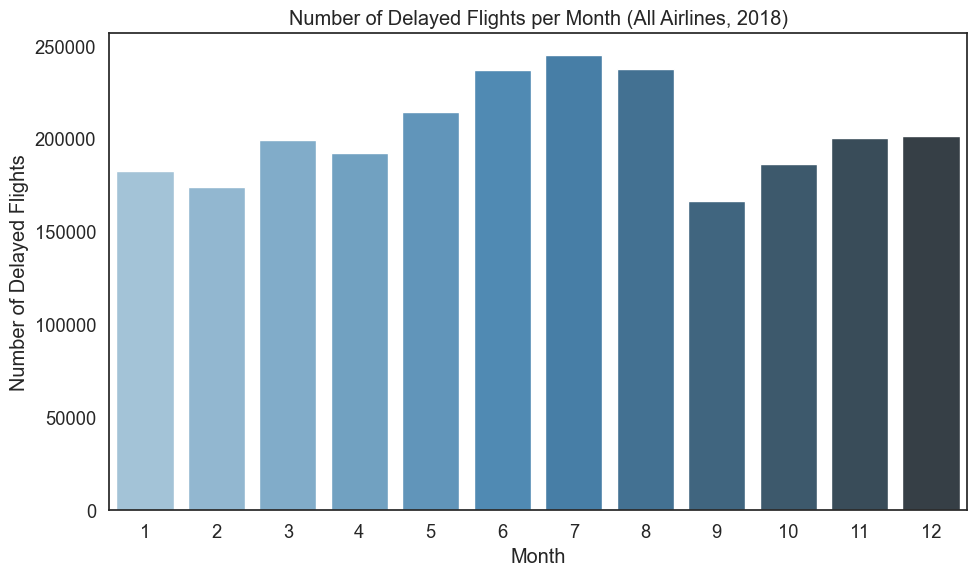

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for delayed flights only (DEP_DELAY > 0) in 2018
delayed_flights_2018 = df_2018[df_2018['DEP_DELAY'] > 0]

# Group by month, count number of delayed flights
monthly_delays_2018 = delayed_flights_2018.groupby('FL_MONTH').size().reset_index(name='num_delays')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_delays_2018, x='FL_MONTH', y='num_delays', palette='Blues_d')
plt.title('Number of Delayed Flights per Month (All Airlines, 2018)')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.tight_layout()
plt.show()

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1192920764.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_airline_delays_2018 = delayed_flights_2018.groupby(['FL_MONTH', 'OP_CARRIER']).size().reset_index(name='num_delays')
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1192920764.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_airline_delays_2018.groupby('OP_CARRIER')['num_delays']
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1192920764.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True i

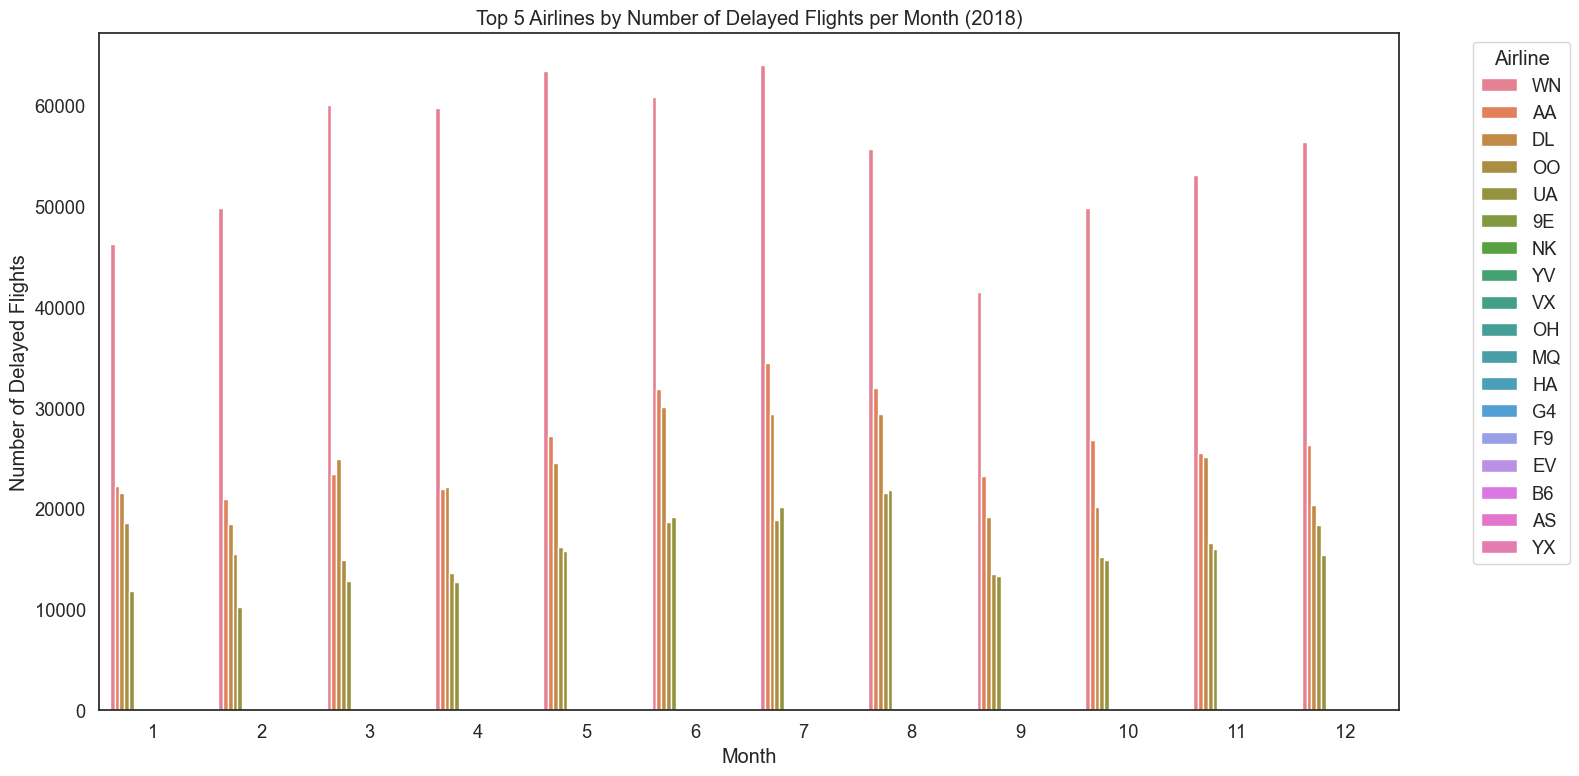

In [202]:
# Calculate number of delayed flights per airline per month for 2018
delayed_flights_2018 = df_2018[df_2018['DEP_DELAY'] > 0]
monthly_airline_delays_2018 = delayed_flights_2018.groupby(['FL_MONTH', 'OP_CARRIER']).size().reset_index(name='num_delays')

# Find top 5 airlines by total number of delayed flights in 2018
top5_carriers_2018 = (
    monthly_airline_delays_2018.groupby('OP_CARRIER')['num_delays']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter for only top 5 airlines
top5_2018 = monthly_airline_delays_2018[monthly_airline_delays_2018['OP_CARRIER'].isin(top5_carriers_2018)]

# Calculate total delayed flights per airline (across all months)
airline_total_delays_2018 = top5_2018.groupby('OP_CARRIER')['num_delays'].sum().sort_values(ascending=False)

# Create a categorical type for OP_CARRIER, ordered by total delays (highest to lowest)
top5_2018['OP_CARRIER'] = pd.Categorical(
    top5_2018['OP_CARRIER'],
    categories=airline_total_delays_2018.index,
    ordered=True
)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=top5_2018,
    x='FL_MONTH',
    y='num_delays',
    hue='OP_CARRIER',
    hue_order=airline_total_delays_2018.index
)
plt.title('Top 5 Airlines by Number of Delayed Flights per Month (2018)')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [205]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])  

In [207]:
carrier = 'AA'
id_airport = 4
liste_origin_airport = df_2018[df_2018['OP_CARRIER'] == carrier]['ORIGIN'].unique()
df2 = df_2018[(df_2018['OP_CARRIER'] == carrier) & (df_2018['ARR_DELAY'] > 0)
              & (df_2018['ORIGIN'] == liste_origin_airport[id_airport])]
df2.sort_values('CRS_DEP_TIME', inplace=True)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2961730705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('CRS_DEP_TIME', inplace=True)


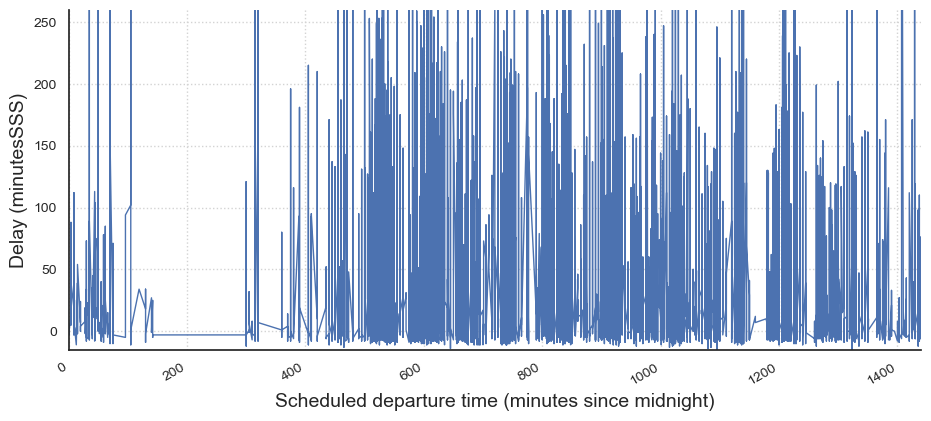

In [212]:
import datetime

# Use 'CRS_DEP_TIME' if 'SCHEDULED_DEPARTURE' does not exist
if 'SCHEDULED_DEPARTURE' in df2.columns:
    x_vals = df2['SCHEDULED_DEPARTURE']
    xlabel = 'Departure date'
else:
    # Convert CRS_DEP_TIME to minutes since midnight for plotting
    def time_to_minutes(x):
        x = str(int(x)).zfill(4)
        hour = int(x[:2])
        minute = int(x[2:])
        return hour * 60 + minute
    x_vals = df2['CRS_DEP_TIME'].apply(time_to_minutes)
    xlabel = 'Scheduled departure time (minutes since midnight)'

fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(x_vals, df2['DEP_DELAY'], linestyle='-')
fig1.style()
fig1.set_ylabel('Delay (minutesSSS)', fontsize=14)
fig1.set_xlabel(xlabel, fontsize=14)
if xlabel == 'Departure date':
    date_1 = datetime.datetime(2018, 6, 1)
    date_2 = datetime.datetime(2018, 7, 30)
    fig1.set_xlim(date_1, date_2)
else:
    fig1.set_xlim(0, 1440)  # 0 to 1440 minutes (full day)
fig1.set_ylim(-15, 260)

In [213]:
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c

# Define get_stats as in cell 55
def get_stats(x):
    return pd.Series({
        'count': x.count(),
        'mean': x.mean(),
        'std': x.std()
    })

# Convert CRS_DEP_TIME to minutes since midnight
def time_to_minutes(x):
    x = str(int(x)).zfill(4)
    hour = int(x[:2])
    minute = int(x[2:])
    return hour * 60 + minute

df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(time_to_minutes)
test2 = df2['DEP_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
x_val = test2.index.values  # already in minutes since midnight
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0=[1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index=test2.index)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/1434189057.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['heure_depart'] = df2['CRS_DEP_TIME'].apply(time_to_minutes)


[Text(0, 0, '00:00'),
 Text(120, 0, '02:00'),
 Text(240, 0, '04:00'),
 Text(360, 0, '06:00'),
 Text(480, 0, '08:00'),
 Text(600, 0, '10:00'),
 Text(720, 0, '12:00'),
 Text(840, 0, '14:00'),
 Text(960, 0, '16:00'),
 Text(1080, 0, '18:00'),
 Text(1200, 0, '20:00'),
 Text(1320, 0, '22:00'),
 Text(1440, 0, '24:00')]

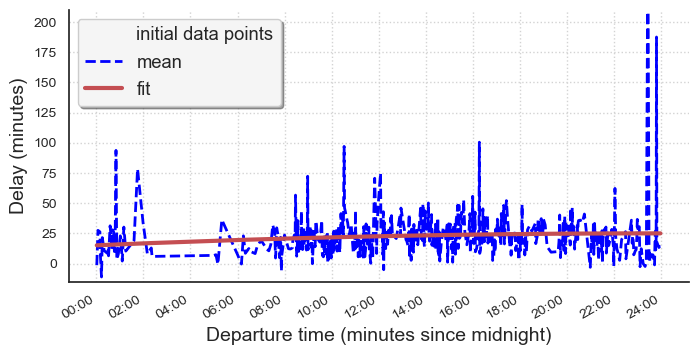

In [214]:
x_vals = df2['heure_depart'].values
mean_x = test2.index.values

fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(x_vals, df2['DEP_DELAY'], linestyle='', color='lightblue', label='initial data points')
fig1.cust_plot(mean_x, test2['mean'].values, linestyle='--', linewidth=2, color='blue', label='mean')
fig1.cust_plot(mean_x, test2['fit'].values, color='r', linestyle='-', linewidth=3, label='fit')
fig1.style()
fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize=14)
fig1.set_xlabel('Departure time (minutes since midnight)', fontsize=14)
fig1.set_ylim(-15, 210)

# Set x-ticks as time-of-day (e.g., 06:00, 12:00, 18:00)
import matplotlib.ticker as ticker
ax = fig1.axs[fig1.ix, fig1.iy]
def min_to_hm(x):
    h = int(x // 60)
    m = int(x % 60)
    return f"{h:02d}:{m:02d}"
xticks = np.arange(0, 1441, 120)  # every 2 hours
ax.set_xticks(xticks)
ax.set_xticklabels([min_to_hm(x) for x in xticks])

- TESTING

In [215]:
carrier = 'AA'
merged_df_2018 = get_merged_delays(df_2018, carrier)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DEP_DELAY'] = df2['DEP_DELAY'].apply(lambda x: x if x < 60 else np.nan)
/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/2999577991.py:18: SettingWithCopyWa

In [216]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

merged_df_2018['AIRPORT_ID'].replace(label_conversion, inplace=True)

for index, label in label_airports:
    temp = merged_df_2018['AIRPORT_ID'] == index
    temp = temp.apply(lambda x: 1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(merged_df_2018['heure_depart_min'])
b = b.reshape(len(b), 1)
X_2018 = np.hstack((matrix, b))
Y_2018 = np.array(merged_df_2018['mean'])
Y_2018 = Y_2018.reshape(len(Y_2018), 1)

/var/folders/87/lqqrw43x75lby9nsqw_cgd1h0000gn/T/ipykernel_98906/3037738587.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_2018['AIRPORT_ID'].replace(label_conversion, inplace=True)


In [217]:
X_ = poly.fit_transform(X_2018)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_2018)
print('MSE = {:.2f}'.format(score))
print('RMSE = {:.2f} min'.format(np.sqrt(score)))

MSE = 36.88
RMSE = 6.07 min


THE MODEL TRAINED ON 2017 DATA, PREDICTS THE AVERAGE DELAY FOR EACH GROUP IN 2018 WITH AN AVERAGE ERROR OF ABOUT 6 MINUTES.


Interpretation:

The MSE and RMSE values are very similar for both years.
This means the model generalizes well: its prediction error on new, unseen 2018 data is almost the same as on the 2017 test set.
The average prediction error is about 6 minutes for both years, showing good stability and robustness of your model across years.

Conclusion:

Your best model trained on 2017 data maintains similar accuracy when predicting 2018 delays, indicating strong generalization and no significant overfitting to the 2017 data.




---

## **1. Data Analysis and Preprocessing**

- **Data Loading & Cleaning:**  
  - Loaded flight data for 2017 and 2018 from CSV files.
  - Dropped irrelevant or highly missing columns (e.g., `Unnamed: 27`, delay reason columns).
  - Converted date columns to datetime and extracted features like month.
  - Encoded categorical variables (airline, origin, destination) as numbers.
  - Removed rows with missing values to ensure data quality.

- **Exploratory Data Analysis (EDA):**  
  - Visualized distributions of departure and arrival delays (both original and log-transformed).
  - Used heatmaps to explore correlations between variables.
  - Created pairplots to examine relationships between features and delays.
  - Performed ANOVA tests to assess the impact of categorical variables (month, carrier, origin, destination) on delays.
  - Analyzed delay patterns by airline, airport, and month.

---

## **2. Feature Engineering**

- Created new features such as:
  - Encoded airline, origin, and destination.
  - Extracted scheduled departure time as minutes since midnight.
  - Aggregated mean delays by airport and carrier for modeling.

---

## **3. Modeling Approaches**

- **Linear Regression:**  
  - Built initial models to predict mean delay as a function of departure time for a single airport and airline.
  - Compared models with and without filtering out extreme delays.

- **Polynomial Regression:**  
  - Used polynomial features (degree 1 and 2) to capture non-linear relationships.
  - Created a custom class (`fit_polynome`) to fit and evaluate polynomial models.

- **Regularization (Ridge Regression):**  
  - Applied Ridge regression to prevent overfitting and improve generalization.
  - Tuned hyperparameters (polynomial degree and alpha) to find the best model.

- **Model for All Airports:**  
  - Extended the model to predict delays for one airline across all airports using one-hot encoding for airport IDs and polynomial features for departure time.

---

## **4. Model Validation**

- **Train/Test Split:**  
  - Split 2017 data into training and test sets based on date.
  - Evaluated model performance on the test set.

- **Cross-Validation:**  
  - Used k-fold cross-validation to assess model generalization and select the best polynomial degree.

- **Testing on Unseen Data:**  
  - Applied the final model (trained on 2017) to the 2018 dataset to test generalization to new, unseen data.

---

## **5. Results**

- **Performance Metrics:**  
  - Used Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate models.
  - The best model (Ridge regression, polynomial degree 1 or 2) achieved an RMSE of about 6 minutes on both 2017 test data and 2018 data, indicating strong generalization.
  - Only a small percentage of predictions differed from actual mean delays by more than 15 minutes.

- **Interpretation:**  
  - The model captures the main factors influencing delays (airline, airport, departure time).
  - The similar performance on 2017 and 2018 data shows no significant overfitting and good robustness.

---

## **Summary Table**

| Step                | Method/Tool Used                | Purpose/Result                                    |
|---------------------|---------------------------------|---------------------------------------------------|
| Data Cleaning       | Pandas, manual filtering        | Remove noise, missing, and irrelevant data        |
| EDA                 | Matplotlib, Seaborn, ANOVA      | Understand distributions, relationships, impacts  |
| Feature Engineering | Encoding, aggregation           | Prepare data for modeling                         |
| Modeling            | Linear, Polynomial, Ridge       | Predict mean delays, capture non-linearity        |
| Validation          | Train/test split, CV, 2018 test | Ensure generalization and avoid overfitting       |
| Results             | MSE, RMSE                       | RMSE ~6 min, stable across years                  |

---

## **Conclusion**

- The project followed a robust data science workflow: cleaning, EDA, feature engineering, modeling, and validation.
- The best model is a regularized polynomial regression (Ridge), using both airport and time features.
- The model generalizes well, with consistent performance on both 2017 and 2018 data.
- Main delay factors: airline, airport, and scheduled departure time.